<a href="https://colab.research.google.com/github/jeong1suk/sto-data/blob/main/predict_baechu.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 35 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/

In [6]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'NanumBarunGothic'
# plt.rcParams['font.family'] = 'DejaVu Sans'
plt.rcParams['axes.unicode_minus'] = False

import seaborn as sns

import os
import warnings
warnings.filterwarnings('ignore')

In [ ]:
def year_baechu_analysis(year, data):
    print(f"=== {year}ÎÖÑ Í∏∞Î≥∏ Ï†ïÎ≥¥ ===")
    print("Ï¥ù Í±∞Îûò Í∏∞Î°ù:", data.shape[0], "Í±¥")

    # ÎÇ†Ïßú Î≤îÏúÑ ÌôïÏù∏
    dates = data['AUC_YMD'].dropna().unique()
    dates.sort()
    print("ÎÇ†Ïßú Î≤îÏúÑ:", dates[0], "~", dates[-1])
    print("Ï¥ù Í±∞ÎûòÏùºÏàò:", len(dates))

    # Ïó∞ÎèÑÎ≥Ñ Í∞ÄÍ≤© ÌÜµÍ≥Ñ
    valid_prices = data[data['PRCE_PER_KG'] > 0]['PRCE_PER_KG']

    print("\n=== Ïó∞ÎèÑÎ≥Ñ kgÎãπ Í∞ÄÍ≤© ÌÜµÍ≥Ñ ===")
    print(f"ÌèâÍ∑†: {valid_prices.mean():.0f}Ïõê/kg")
    print(f"Ï§ëÏïôÍ∞í: {valid_prices.median():}Ïõê/kg")
    print(f"ÏµúÏ†Ä: {valid_prices.min()}Ïõê/kg")
    print(f"ÏµúÍ≥†: {valid_prices.max()}Ïõê/kg")
    print(f"ÌëúÏ§ÄÌé∏Ï∞®: {valid_prices.std():.0f}Ïõê/kg")

    # ÏõîÎ≥Ñ ÌèâÍ∑†
    data['month'] = pd.to_datetime(data['AUC_YMD']).dt.strftime('%m')
    monthly_avg = data.groupby('month')['PRCE_PER_KG'].mean().round(0)

    print(f"\n=== {year}ÎÖÑ ÏõîÎ≥Ñ ÌèâÍ∑† kgÎãπ Í∞ÄÍ≤© ===")
    for month, avg_price in monthly_avg.items():
        print(f"{month}Ïõî: {avg_price}Ïõê/kg")

# 20ÎÖÑ Î∞∞Ï∂î Í∞ÄÍ≤©

**Í∏∞Î≥∏ Ï†ïÎ≥¥:**

* Ï¥ù 66,307Í±¥Ïùò Í±∞Îûò Í∏∞Î°ù (306Í±∞ÎûòÏùº)
* 10Í∞ú Î∞∞Ï∂î Ï¢ÖÎ•ò, 3Í∞ú Ï£ºÏöî Îì±Í∏â (Ìäπ, ÏÉÅ, Î≥¥ÌÜµ)
* kgÎãπ ÌèâÍ∑† 2,684Ïõê (ÏµúÏ†Ä 37.5Ïõê ~ ÏµúÍ≥† 78,125Ïõê)

**Ï£ºÏöî ÏÇ∞ÏßÄ**: Ï†ÑÎÇ® Ìï¥ÎÇ®, Í≤ΩÎ∂Å ÍπÄÏ≤ú, Í≤ΩÍ∏∞ ÏñëÌèâ, Í∞ïÏõê ÌèâÏ∞Ω Îì±

**Í≥ÑÏ†àÎ≥Ñ Í∞ÄÍ≤© Ìå®ÌÑ¥:**

* ÏµúÍ≥†Í∞Ä: 4Ïõî(4,161Ïõê), 8Ïõî(4,613Ïõê) - Îã®Í≤ΩÍ∏∞
* ÏµúÏ†ÄÍ∞Ä: 11Ïõî(1,054Ïõê), 10Ïõî(1,642Ïõê) - ÍπÄÏû•Ï≤†

In [ ]:
data2020 = pd.read_csv("/content/baechu_data_2020.csv")

In [ ]:
data2020.columns

Index(['Unnamed: 0', 'SN', 'AUC_YMD', 'WHSL_MRKT_CODE', 'WHSL_MRKT_NM',
       'WMK_CORP_CODE', 'WMK_CORP_NM', 'PDLT_CODE', 'PDLT_NM', 'SPCS_CODE',
       'SPCS_NM', 'UNIT_CODE', 'UNIT_NM', 'PKG_STLE_CODE', 'PKG_STLE_NM',
       'NOP_CODE', 'NOP_NM', 'MTC_GRAD_CODE', 'MTC_GRAD_NM', 'MTC_NM',
       'UNIT_QYT', 'PRCE', 'ETL_LDG_DT', 'KG_UNIT_CNVR_QYT', 'PRCE_PER_KG'],
      dtype='object')

In [ ]:
print("Ï¥ù Ìñâ Ïàò:", data2020.shape[0])
print("Ïª¨Îüº Ïàò:", data2020.shape[1])
print("Ïª¨Îüº Î™Ö:", list(data2020.columns))

print("\n=== Ï≤´ 5Ìñâ Îç∞Ïù¥ÌÑ∞ ===")
data2020.head()

Ï¥ù Ìñâ Ïàò: 66307
Ïª¨Îüº Ïàò: 25
Ïª¨Îüº Î™Ö: ['Unnamed: 0', 'SN', 'AUC_YMD', 'WHSL_MRKT_CODE', 'WHSL_MRKT_NM', 'WMK_CORP_CODE', 'WMK_CORP_NM', 'PDLT_CODE', 'PDLT_NM', 'SPCS_CODE', 'SPCS_NM', 'UNIT_CODE', 'UNIT_NM', 'PKG_STLE_CODE', 'PKG_STLE_NM', 'NOP_CODE', 'NOP_NM', 'MTC_GRAD_CODE', 'MTC_GRAD_NM', 'MTC_NM', 'UNIT_QYT', 'PRCE', 'ETL_LDG_DT', 'KG_UNIT_CNVR_QYT', 'PRCE_PER_KG']

=== Ï≤´ 5Ìñâ Îç∞Ïù¥ÌÑ∞ ===


Unnamed: 0  SN     AUC_YMD  WHSL_MRKT_CODE WHSL_MRKT_NM  WMK_CORP_CODE  \
0        2662  20  2020-01-03          110001       ÏÑúÏö∏Í∞ÄÎùΩÎèÑÎß§       11000102   
1        2663  21  2020-01-03          110001       ÏÑúÏö∏Í∞ÄÎùΩÎèÑÎß§       11000102   
2        2664  25  2020-01-03          110001       ÏÑúÏö∏Í∞ÄÎùΩÎèÑÎß§       11000106   
3        2665  26  2020-01-03          110001       ÏÑúÏö∏Í∞ÄÎùΩÎèÑÎß§       11000106   
4        2666  27  2020-01-03          110001       ÏÑúÏö∏Í∞ÄÎùΩÎèÑÎß§       11000106   

  WMK_CORP_NM  PDLT_CODE PDLT_NM  SPCS_CODE  ... NOP_CODE  NOP_NM  \
0     ÎÜçÌòëÍ∞ÄÎùΩ(Í≥µ)       1001      Î∞∞Ï∂î   100199.0  ...      100       .   
1     ÎÜçÌòëÍ∞ÄÎùΩ(Í≥µ)       1001      Î∞∞Ï∂î   100199.0  ...      100       .   
2        ÎåÄÏïÑÏ≤≠Í≥º       1001      Î∞∞Ï∂î   100104.0  ...      103      3Í∞ú   
3        ÎåÄÏïÑÏ≤≠Í≥º       1001      Î∞∞Ï∂î   100104.0  ...      103      3Í∞ú   
4        ÎåÄÏïÑÏ≤≠Í≥º       1001      Î∞∞Ï∂î   100104.0  ...      103      3Í∞ú   

  MTC_GRAD_CODE  MTC_GRAD_NM    MTC_NM  UNIT_QYT     PRCE      ETL_LDG_DT  \
0            11            Ìäπ    Í≤ΩÍ∏∞ Ïó¨Ï£ºÍµ∞       6.0  20000.0  20210629184341   
1            11            Ìäπ    Í≤ΩÍ∏∞ Ïó¨Ï£ºÍµ∞       6.0  21000.0  20210629184341   
2            11            Ìäπ  Ï†ÑÎùºÎÇ®ÎèÑ Ìï¥ÎÇ®Íµ∞     800.0   8500.0  20210629184341   
3            12            ÏÉÅ  Ï†ÑÎùºÎÇ®ÎèÑ Ìï¥ÎÇ®Íµ∞     200.0   5100.0  20210629184341   
4            11            Ìäπ  Ï†ÑÎùºÎÇ®ÎèÑ Ìï¥ÎÇ®Íµ∞     760.0   9500.0  20210629184341   

  KG_UNIT_CNVR_QYT PRCE_PER_KG  
0              2.0     10000.0  
1              2.0     10500.0  
2             10.0       850.0  
3             10.0       510.0  
4             10.0       950.0  

[5 rows x 25 columns]

In [ ]:
# NaN Í∞í ÌôïÏù∏ Î∞è Ï†úÍ±∞ (JavaScriptÏùò filter(date => date)ÏôÄ Ïú†ÏÇ¨)
df_filtered = data2020.dropna(subset=['AUC_YMD']).copy() # ÎÇ†ÏßúÍ∞Ä ÏóÜÎäî Ìñâ Ï†úÍ±∞

# 2. ÎÇ†Ïßú Î≤îÏúÑ Î∞è Ï£ºÏöî ÌäπÏÑ± Î∂ÑÏÑù
# JavaScriptÏùò map().filter().sort() ÎåÄÏ≤¥
if not df_filtered.empty:
    df_filtered['AUC_YMD'] = pd.to_datetime(df_filtered['AUC_YMD']) # ÌòπÏãú ÌååÏã±Ïù¥ ÏïàÎêêÏùÑÍπåÎ¥ê Îã§Ïãú ÌôïÏù∏
    min_date = df_filtered['AUC_YMD'].min().strftime('%Y-%m-%d')
    max_date = df_filtered['AUC_YMD'].max().strftime('%Y-%m-%d')
    total_unique_dates = df_filtered['AUC_YMD'].nunique()

    print(f"ÎÇ†Ïßú Î≤îÏúÑ: {min_date} ~ {max_date}")
    print(f"Ï¥ù Í±∞ÎûòÏùºÏàò: {total_unique_dates}")
else:
    print("ÎÇ†Ïßú Îç∞Ïù¥ÌÑ∞Î•º Ï∞æÏùÑ Ïàò ÏóÜÏñ¥ ÎÇ†Ïßú Î≤îÏúÑ Î∂ÑÏÑùÏùÑ Í±¥ÎÑàÎúúÎãàÎã§.")


# 3. Î∞∞Ï∂î Ï¢ÖÎ•òÎ≥Ñ Î∂ÑÏÑù
if 'SPCS_NM' in data2020.columns:
    species_count = data2020['SPCS_NM'].value_counts().sort_index()
    print("\n=== Î∞∞Ï∂î Ï¢ÖÎ•òÎ≥Ñ Í±∞Îûò Í±¥Ïàò ===")
    print(species_count)
else:
    print("\nÍ≤ΩÍ≥†: 'SPCS_NM' Ïª¨ÎüºÏù¥ Îç∞Ïù¥ÌÑ∞Ïóê ÏóÜÏäµÎãàÎã§.")


# 4. Îì±Í∏âÎ≥Ñ Î∂ÑÏÑù
if 'MTC_GRAD_NM' in data2020.columns:
    grade_count = data2020['MTC_GRAD_NM'].value_counts().sort_index()
    print("\n=== Îì±Í∏âÎ≥Ñ Í±∞Îûò Í±¥Ïàò ===")
    print(grade_count)
else:
    print("\nÍ≤ΩÍ≥†: 'MTC_GRAD_NM' Ïª¨ÎüºÏù¥ Îç∞Ïù¥ÌÑ∞Ïóê ÏóÜÏäµÎãàÎã§.")


# 5. Í∞ÄÍ≤© Î∂ÑÏÑù (kgÎãπ Í∞ÄÍ≤© Í∏∞Ï§Ä) (JavaScriptÏùò filter().map() Î∞è _.mean, _.min, _.max ÎåÄÏ≤¥)
if 'PRCE_PER_KG' in data2020.columns:
    # PRCE_PER_KGÍ∞Ä NaNÏù¥ ÏïÑÎãàÎ©¥ÏÑú 0Î≥¥Îã§ ÌÅ∞ Í∞íÎßå ÌïÑÌÑ∞ÎßÅ
    valid_prices = data2020[data2020['PRCE_PER_KG'].notna() & (data2020['PRCE_PER_KG'] > 0)]['PRCE_PER_KG']

    if not valid_prices.empty:
        mean_price = np.mean(valid_prices)
        median_price = np.median(valid_prices) # numpyÏùò median ÏÇ¨Ïö©
        min_price = np.min(valid_prices)
        max_price = np.max(valid_prices)

        print("\n=== 2020ÎÖÑ kgÎãπ Í∞ÄÍ≤© ÌÜµÍ≥Ñ ===")
        print(f"ÌèâÍ∑†: {mean_price:.0f}Ïõê/kg")
        print(f"Ï§ëÏïôÍ∞í: {median_price:.0f}Ïõê/kg") # Ï§ëÏïôÍ∞íÎèÑ Ï†ïÏàòÎ°ú ÌëúÏãú
        print(f"ÏµúÏ†Ä: {min_price:.0f}Ïõê/kg")
        print(f"ÏµúÍ≥†: {max_price:.0f}Ïõê/kg")
    else:
        print("\nÏú†Ìö®Ìïú 'PRCE_PER_KG' Îç∞Ïù¥ÌÑ∞Í∞Ä ÏóÜÏñ¥ Í∞ÄÍ≤© ÌÜµÍ≥ÑÎ•º Í≥ÑÏÇ∞Ìï† Ïàò ÏóÜÏäµÎãàÎã§.")
else:
    print("\nÍ≤ΩÍ≥†: 'PRCE_PER_KG' Ïª¨ÎüºÏù¥ Îç∞Ïù¥ÌÑ∞Ïóê ÏóÜÏäµÎãàÎã§. 'PRCE'ÏôÄ 'KG_UNIT_CNVR_QYT'Î°ú Í≥ÑÏÇ∞ ÌïÑÏöî.")
    # PRCE_PER_KG Ïª¨ÎüºÏù¥ ÏóÜÎäî Í≤ΩÏö∞, ÏßÅÏ†ë Í≥ÑÏÇ∞ Î°úÏßÅ Ï∂îÍ∞Ä
    if 'PRCE' in data2020.columns and 'KG_UNIT_CNVR_QYT' in data2020.columns:
        # KG_UNIT_CNVR_QYTÍ∞Ä 0Ïù∏ Í≤ΩÏö∞ NaN Î∞©ÏßÄ
        data2020['KG_UNIT_CNVR_QYT'] = data2020['KG_UNIT_CNVR_QYT'].replace(0, np.nan)
        data2020['PRCE_PER_KG'] = data2020['PRCE'] / data2020['KG_UNIT_CNVR_QYT']
        valid_prices = data2020[data2020['PRCE_PER_KG'].notna() & (data2020['PRCE_PER_KG'] > 0)]['PRCE_PER_KG']

        if not valid_prices.empty:
            mean_price = np.mean(valid_prices)
            median_price = np.median(valid_prices)
            min_price = np.min(valid_prices)
            max_price = np.max(valid_prices)

            print("\n=== 2020ÎÖÑ kgÎãπ Í∞ÄÍ≤© ÌÜµÍ≥Ñ (Í≥ÑÏÇ∞Îêú PRCE_PER_KG ÏÇ¨Ïö©) ===")
            print(f"ÌèâÍ∑†: {mean_price:.0f}Ïõê/kg")
            print(f"Ï§ëÏïôÍ∞í: {median_price:.0f}Ïõê/kg")
            print(f"ÏµúÏ†Ä: {min_price:.0f}Ïõê/kg")
            print(f"ÏµúÍ≥†: {max_price:.0f}Ïõê/kg")
        else:
            print("\nÏú†Ìö®Ìïú 'PRCE_PER_KG' Îç∞Ïù¥ÌÑ∞ (Í≥ÑÏÇ∞ ÌõÑ)Í∞Ä ÏóÜÏñ¥ Í∞ÄÍ≤© ÌÜµÍ≥ÑÎ•º Í≥ÑÏÇ∞Ìï† Ïàò ÏóÜÏäµÎãàÎã§.")

ÎÇ†Ïßú Î≤îÏúÑ: 2020-01-03 ~ 2020-12-31
Ï¥ù Í±∞ÎûòÏùºÏàò: 306

=== Î∞∞Ï∂î Ï¢ÖÎ•òÎ≥Ñ Í±∞Îûò Í±¥Ïàò ===
SPCS_NM
Í≥†ÎÉâÏßÄÎ∞∞Ï∂î        5809
Í∏∞ÌÉÄÎ∞∞Ï∂î        17494
ÍπÄÏû•(Í∞ÄÏùÑ)Î∞∞Ï∂î    10213
Î¥ÑÎ∞∞Ï∂î          4424
ÏåàÎ∞∞Ï∂î         17416
Ïó¨Î¶ÑÎ∞∞Ï∂î         2319
Ïö∞Í±∞ÏßÄ            69
ÏõîÎèôÎ∞∞Ï∂î         3341
Ï†ÄÏû•Î∞∞Ï∂î         2877
Ï†àÏûÑÎ∞∞Ï∂î         2345
Name: count, dtype: int64

=== Îì±Í∏âÎ≥Ñ Í±∞Îûò Í±¥Ïàò ===
MTC_GRAD_NM
.        52
4Îì±       30
5Îì±       27
6Îì±       28
Îì±Ïô∏       29
Î≥¥ÌÜµ     1207
ÏÉÅ     15792
Ìäπ     49142
Name: count, dtype: int64

=== 2020ÎÖÑ kgÎãπ Í∞ÄÍ≤© ÌÜµÍ≥Ñ ===
ÌèâÍ∑†: 2684Ïõê/kg
Ï§ëÏïôÍ∞í: 1300Ïõê/kg
ÏµúÏ†Ä: 38Ïõê/kg
ÏµúÍ≥†: 78125Ïõê/kg


In [ ]:
# ÌïÑÏöîÌïú Ïª¨ÎüºÏù¥ ÏûàÎäîÏßÄ ÌôïÏù∏
required_cols = ['MTC_NM', 'AUC_YMD', 'PRCE_PER_KG', 'SPCS_NM']
for col in required_cols:
    if col not in data2020.columns:
        print(f"Í≤ΩÍ≥†: ÌïÑÏàò Ïª¨Îüº '{col}'Ïù¥ Îç∞Ïù¥ÌÑ∞Ïóê ÏóÜÏäµÎãàÎã§. Ìï¥Îãπ Î∂ÑÏÑùÏùÄ Í±¥ÎÑàÎúÅÎãàÎã§.")
        # Ìï¥Îãπ Ïª¨ÎüºÏù¥ ÏóÜÏúºÎ©¥ Í¥ÄÎ†® Î∂ÑÏÑùÏùÑ Í±¥ÎÑàÎõ∏ Ïàò ÏûàÎèÑÎ°ù ÌîåÎûòÍ∑∏ ÏÑ§Ï†ï
        if col == 'MTC_NM': has_mtc_nm = False
        if col == 'AUC_YMD': has_auc_ymd = False
        if col == 'PRCE_PER_KG': has_prce_per_kg = False
        if col == 'SPCS_NM': has_spcs_nm = False

# 1. Ï£ºÏÇ∞ÏßÄ Î∂ÑÏÑù (JavaScriptÏùò _.countBy, sort, slice ÎåÄÏ≤¥)
if 'MTC_NM' in data2020.columns:
    origin_count = data2020['MTC_NM'].value_counts() # ÏûêÎèôÏúºÎ°ú ÎÇ¥Î¶ºÏ∞®Ïàú Ï†ïÎ†¨Îê®
    top_origins = origin_count.head(10) # ÏÉÅÏúÑ 10Í∞ú ÏÑ†ÌÉù

    print("\n=== Ï£ºÏöî ÏÇ∞ÏßÄ TOP 10 ===")
    for origin, count in top_origins.items():
        print(f"{origin}: {count}Í±¥")
else:
    print("\n'MTC_NM' Ïª¨ÎüºÏù¥ ÏóÜÏñ¥ Ï£ºÏÇ∞ÏßÄ Î∂ÑÏÑùÏùÑ Í±¥ÎÑàÎúúÎãàÎã§.")


# 2. ÏõîÎ≥Ñ ÌèâÍ∑† Í∞ÄÍ≤© Î∂ÑÏÑù (JavaScriptÏùò filter, map, groupBy, mapValues, mean ÎåÄÏ≤¥)
if 'AUC_YMD' in data2020.columns and 'PRCE_PER_KG' in data2020.columns:
    # Ïú†Ìö®Ìïú Í∞ÄÍ≤© Îç∞Ïù¥ÌÑ∞Îßå ÌïÑÌÑ∞ÎßÅÌïòÍ≥†, PRCE_PER_KGÍ∞Ä 0Î≥¥Îã§ ÌÅ∞ Í∞íÎßå ÏÇ¨Ïö©
    monthly_data_filtered = data2020[data2020['AUC_YMD'].notna() & data2020['PRCE_PER_KG'].notna() & (data2020['PRCE_PER_KG'] > 0)].copy()

    if not monthly_data_filtered.empty:
        # AUC_YMD Ïª¨ÎüºÏùÑ datetime ÌÉÄÏûÖÏúºÎ°ú Î™ÖÏãúÏ†Å Î≥ÄÌôò
        # errors='coerce' ÏòµÏÖòÏùÄ ÌååÏã± Î∂àÍ∞ÄÎä•Ìïú Í∞íÏùÑ NaT (Not a Time)Î°ú ÎßåÎì≠ÎãàÎã§.
        monthly_data_filtered['AUC_YMD'] = pd.to_datetime(monthly_data_filtered['AUC_YMD'], errors='coerce')

        # NaT Í∞í Ï†úÍ±∞ (ÌååÏã± Ïã§Ìå®Ìïú ÎÇ†ÏßúÎäî Î∂ÑÏÑùÏóêÏÑú Ï†úÏô∏)
        monthly_data_filtered = monthly_data_filtered.dropna(subset=['AUC_YMD'])

        # Ïõî Ï∂îÏ∂ú
        monthly_data_filtered['month'] = monthly_data_filtered['AUC_YMD'].dt.strftime('%m')

        # ÏõîÎ≥Ñ ÌèâÍ∑† Í∞ÄÍ≤© Í≥ÑÏÇ∞
        monthly_avg = monthly_data_filtered.groupby('month')['PRCE_PER_KG'].mean().round(0).astype(int)

        print("\n=== 2020ÎÖÑ ÏõîÎ≥Ñ ÌèâÍ∑† kgÎãπ Í∞ÄÍ≤© ===")
        # Ïõî ÏàúÏÑúÎåÄÎ°ú Ï∂úÎ†• (Ïù∏Îç±Ïä§Í∞Ä Ïù¥ÎØ∏ Ïõî ÏàúÏúºÎ°ú Ï†ïÎ†¨Îê®)
        for month, avg_price in monthly_avg.items():
            print(f"{month}Ïõî: {avg_price}Ïõê/kg")
    else:
        print("\nÏú†Ìö®Ìïú 'AUC_YMD' ÎòêÎäî 'PRCE_PER_KG' Îç∞Ïù¥ÌÑ∞Í∞Ä ÏóÜÏñ¥ ÏõîÎ≥Ñ ÌèâÍ∑† Í∞ÄÍ≤© Î∂ÑÏÑùÏùÑ Í±¥ÎÑàÎúúÎãàÎã§.")
else:
    print("\n'AUC_YMD' ÎòêÎäî 'PRCE_PER_KG' Ïª¨ÎüºÏù¥ ÏóÜÏñ¥ ÏõîÎ≥Ñ ÌèâÍ∑† Í∞ÄÍ≤© Î∂ÑÏÑùÏùÑ Í±¥ÎÑàÎúúÎãàÎã§.")


# 3. Î∞∞Ï∂î Ï¢ÖÎ•òÎ≥Ñ Í≥ÑÏ†àÏÑ± Í∞ÑÎã® Î∂ÑÏÑù (JavaScriptÏùò filter, mean ÎåÄÏ≤¥)
if 'SPCS_NM' in data2020.columns and 'PRCE_PER_KG' in data2020.columns:
    main_species = ['ÏõîÎèôÎ∞∞Ï∂î', 'Î¥ÑÎ∞∞Ï∂î', 'Ïó¨Î¶ÑÎ∞∞Ï∂î', 'ÍπÄÏû•(Í∞ÄÏùÑ)Î∞∞Ï∂î', 'Í≥†ÎÉâÏßÄÎ∞∞Ï∂î']
    print("\n=== Ï£ºÏöî Î∞∞Ï∂î Ï¢ÖÎ•òÎ≥Ñ Í±∞Îûò ÌòÑÌô© ===")

    for species in main_species:
        # Ìï¥Îãπ Ï¢ÖÎ•òÏùò Î∞∞Ï∂î Îç∞Ïù¥ÌÑ∞ ÌïÑÌÑ∞ÎßÅ
        species_data = data2020[data2020['SPCS_NM'] == species].copy()

        # Í±∞Îûò Í±¥Ïàò Í≥ÑÏÇ∞
        count = len(species_data)

        # Ïú†Ìö®Ìïú Í∞ÄÍ≤© Îç∞Ïù¥ÌÑ∞Îßå ÌïÑÌÑ∞ÎßÅÌïòÏó¨ ÌèâÍ∑† Í≥ÑÏÇ∞
        valid_species_prices = species_data[species_data['PRCE_PER_KG'].notna() & (species_data['PRCE_PER_KG'] > 0)]['PRCE_PER_KG']

        avg_price = np.nan # Í∏∞Î≥∏Í∞íÏùÄ NaN
        if not valid_species_prices.empty:
            avg_price = round(np.mean(valid_species_prices))

        print(f"{species}: {count}Í±¥, ÌèâÍ∑† {avg_price if not np.isnan(avg_price) else 'N/A'}Ïõê/kg")
else:
    print("\n'SPCS_NM' ÎòêÎäî 'PRCE_PER_KG' Ïª¨ÎüºÏù¥ ÏóÜÏñ¥ Ï£ºÏöî Î∞∞Ï∂î Ï¢ÖÎ•òÎ≥Ñ Í±∞Îûò ÌòÑÌô© Î∂ÑÏÑùÏùÑ Í±¥ÎÑàÎúúÎãàÎã§.")


=== Ï£ºÏöî ÏÇ∞ÏßÄ TOP 10 ===
Ï†ÑÎùºÎÇ®ÎèÑ Ìï¥ÎÇ®Íµ∞: 10277Í±¥
Í≤ΩÏÉÅÎ∂ÅÎèÑ ÍπÄÏ≤úÏãú: 8101Í±¥
Í≤ΩÍ∏∞ÎèÑ ÏñëÌèâÍµ∞: 5705Í±¥
Í∞ïÏõêÎèÑ ÌèâÏ∞ΩÍµ∞: 5177Í±¥
Í≤ΩÏÉÅÎ∂ÅÎèÑ ÏòÅÏñëÍµ∞: 3119Í±¥
Í∞ïÏõêÎèÑ Í∞ïÎ¶âÏãú: 2887Í±¥
Ï†ÑÎùºÎÇ®ÎèÑ ÏßÑÎèÑÍµ∞: 1740Í±¥
Í∞ïÏõêÎèÑ ÌÉúÎ∞±Ïãú: 1701Í±¥
Í≤ΩÏÉÅÎÇ®ÎèÑ Î∞ÄÏñëÏãú: 1339Í±¥
Í∞ïÏõêÎèÑ Ìö°ÏÑ±Íµ∞: 1254Í±¥

=== 2020ÎÖÑ ÏõîÎ≥Ñ ÌèâÍ∑† kgÎãπ Í∞ÄÍ≤© ===
01Ïõî: 3108Ïõê/kg
02Ïõî: 2773Ïõê/kg
03Ïõî: 3235Ïõê/kg
04Ïõî: 4161Ïõê/kg
05Ïõî: 2467Ïõê/kg
06Ïõî: 2355Ïõê/kg
07Ïõî: 2682Ïõê/kg
08Ïõî: 4613Ïõê/kg
09Ïõî: 3735Ïõê/kg
10Ïõî: 1642Ïõê/kg
11Ïõî: 1054Ïõê/kg
12Ïõî: 1873Ïõê/kg

=== Ï£ºÏöî Î∞∞Ï∂î Ï¢ÖÎ•òÎ≥Ñ Í±∞Îûò ÌòÑÌô© ===
ÏõîÎèôÎ∞∞Ï∂î: 3341Í±¥, ÌèâÍ∑† 627Ïõê/kg
Î¥ÑÎ∞∞Ï∂î: 4424Í±¥, ÌèâÍ∑† 571Ïõê/kg
Ïó¨Î¶ÑÎ∞∞Ï∂î: 2319Í±¥, ÌèâÍ∑† 654Ïõê/kg
ÍπÄÏû•(Í∞ÄÏùÑ)Î∞∞Ï∂î: 10213Í±¥, ÌèâÍ∑† 454Ïõê/kg
Í≥†ÎÉâÏßÄÎ∞∞Ï∂î: 5809Í±¥, ÌèâÍ∑† 1403Ïõê/kg


# 21ÎÖÑ Î∞∞Ï∂î Í∞ÄÍ≤©

1. Í≥ÑÏ†àÏÑ± Ìå®ÌÑ¥Ïùò Î∂àÏùºÏπò

    * 2020ÎÖÑ: 8Ïõî ÏµúÍ≥†Í∞Ä(4,613Ïõê), 11Ïõî ÏµúÏ†ÄÍ∞Ä(1,054Ïõê)
    * 2021ÎÖÑ: 4Ïõî ÏµúÍ≥†Í∞Ä(4,037Ïõê), 11Ïõî ÏµúÏ†ÄÍ∞Ä(1,553Ïõê)
    * 8Ïõî Í∞ÄÍ≤©: 2020ÎÖÑ 4,613Ïõê ‚Üí 2021ÎÖÑ 2,975Ïõê (-35.5% Í∏âÎùΩ)
    * 10Ïõî Í∞ÄÍ≤©: 2020ÎÖÑ 1,642Ïõê ‚Üí 2021ÎÖÑ 2,822Ïõê (+71.9% Í∏âÎì±)

2. Í≥ÑÏ†àÎ≥Ñ Ìå®ÌÑ¥ Î≥ÄÌôî

    * Ïó¨Î¶ÑÏ≤†: 2020ÎÖÑ Í≥†Í∞Ä ‚Üí 2021ÎÖÑ Ï†ÄÍ∞Ä (-739Ïõê)
    * Í∞ÄÏùÑÏ≤†: 2020ÎÖÑ Ï†ÄÍ∞Ä ‚Üí 2021ÎÖÑ Ï§ëÍ∞Ä (+394Ïõê)

In [ ]:
# 2021ÎÖÑ Î∞∞Ï∂î Îç∞Ïù¥ÌÑ∞ Î∂ÑÏÑù
data2021 = pd.read_csv('baechu_data_2021.csv')

year_baechu_analysis(2021, data2021)

=== 2021ÎÖÑ Í∏∞Î≥∏ Ï†ïÎ≥¥ ===
Ï¥ù Í±∞Îûò Í∏∞Î°ù: 69367 Í±¥
ÎÇ†Ïßú Î≤îÏúÑ: 2021-01-04 ~ 2021-12-31
Ï¥ù Í±∞ÎûòÏùºÏàò: 303

=== Ïó∞ÎèÑÎ≥Ñ kgÎãπ Í∞ÄÍ≤© ÌÜµÍ≥Ñ ===
ÌèâÍ∑†: 2703Ïõê/kg
Ï§ëÏïôÍ∞í: 1100.0Ïõê/kg
ÏµúÏ†Ä: 30.0Ïõê/kg
ÏµúÍ≥†: 210000.0Ïõê/kg
ÌëúÏ§ÄÌé∏Ï∞®: 4772Ïõê/kg

=== 2021ÎÖÑ ÏõîÎ≥Ñ ÌèâÍ∑† kgÎãπ Í∞ÄÍ≤© ===
01Ïõî: 3973.0Ïõê/kg
02Ïõî: 2540.0Ïõê/kg
03Ïõî: 3132.0Ïõê/kg
04Ïõî: 4037.0Ïõê/kg
05Ïõî: 2629.0Ïõê/kg
06Ïõî: 2054.0Ïõê/kg
07Ïõî: 2406.0Ïõê/kg
08Ïõî: 2974.0Ïõê/kg
09Ïõî: 3239.0Ïõê/kg
10Ïõî: 2821.0Ïõê/kg
11Ïõî: 1553.0Ïõê/kg
12Ïõî: 2198.0Ïõê/kg


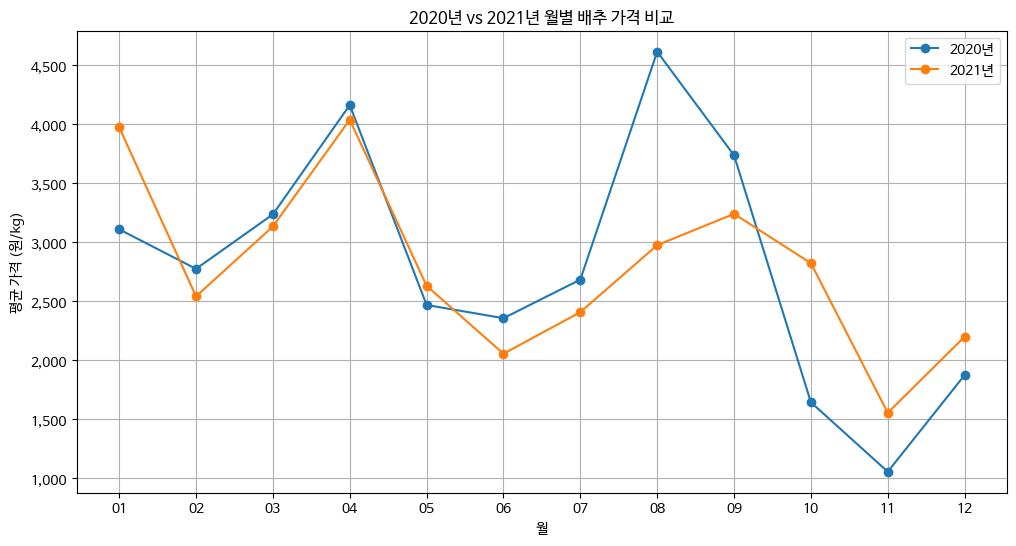

In [ ]:
# 2020ÎÖÑÍ≥º 2021ÎÖÑ ÏõîÎ≥Ñ ÌèâÍ∑† Í∞ÄÍ≤© Îç∞Ïù¥ÌÑ∞
months = monthly_avg.index
price_2020 = monthly_avg.values
price_2021 = monthly_avg_2021.values

# Í∑∏ÎûòÌîÑ ÏÉùÏÑ±
plt.figure(figsize=(12, 6))
plt.plot(months, price_2020, marker='o', linestyle='-', label='2020ÎÖÑ')
plt.plot(months, price_2021, marker='o', linestyle='-', label='2021ÎÖÑ')

# Í∑∏ÎûòÌîÑ Ï†úÎ™© Î∞è Ï∂ï Î†àÏù¥Î∏î ÏÑ§Ï†ï
plt.title('2020ÎÖÑ vs 2021ÎÖÑ ÏõîÎ≥Ñ Î∞∞Ï∂î Í∞ÄÍ≤© ÎπÑÍµê')
plt.xlabel('Ïõî')
plt.ylabel('ÌèâÍ∑† Í∞ÄÍ≤© (Ïõê/kg)')
plt.grid(True)
plt.legend()

# yÏ∂ï Îã®ÏúÑÎ•º "Ïõê"ÏúºÎ°ú ÌëúÏãú
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: format(int(x), ',')))

plt.show()

In [ ]:
# ÏõîÎ≥Ñ Í∞ÄÍ≤© Ï∞®Ïù¥ (ÌçºÏÑºÌä∏)
price_diff_percent = ((price_2021 - price_2020) / price_2020) * 100

print("=== 2020ÎÖÑ ÎåÄÎπÑ 2021ÎÖÑ ÏõîÎ≥Ñ Í∞ÄÍ≤© Îì±ÎùΩÎ•† ===")
for i, month in enumerate(months):
    print(f"{month}Ïõî: {price_diff_percent[i]:.2f}%")

=== 2020ÎÖÑ ÎåÄÎπÑ 2021ÎÖÑ ÏõîÎ≥Ñ Í∞ÄÍ≤© Îì±ÎùΩÎ•† ===
01Ïõî: 27.83%
02Ïõî: -8.40%
03Ïõî: -3.18%
04Ïõî: -2.98%
05Ïõî: 6.57%
06Ïõî: -12.78%
07Ïõî: -10.29%
08Ïõî: -35.53%
09Ïõî: -13.28%
10Ïõî: 71.80%
11Ïõî: 47.34%
12Ïõî: 17.35%


# 22ÎÖÑ Î∞∞Ï∂î Í∞ÄÍ≤©

Ï£ºÏöî Î∞úÍ≤¨ÏÇ¨Ìï≠
1. ÏµúÍ≥†Í∞Ä Î∞úÏÉù ÏõîÏùò ÏôÑÏ†ÑÌïú Î≥ÄÌôî

    * 2020ÎÖÑ: 8Ïõî ÏµúÍ≥†Í∞Ä (4,613Ïõê) - Ïó¨Î¶ÑÏ≤† Í≥µÍ∏â Î∂ÄÏ°±
    * 2021ÎÖÑ: 4Ïõî ÏµúÍ≥†Í∞Ä (4,037Ïõê) - Î¥ÑÏ≤† Í≥µÍ∏â Î∂ÄÏ°±
    * 2022ÎÖÑ: 7Ïõî ÏµúÍ≥†Í∞Ä (3,722Ïõê) - Îã§Ïãú Ïó¨Î¶ÑÏ≤†Î°ú Ïù¥Îèô

2. ÏõîÎ≥Ñ Í∞ÄÍ≤© Î≥ÄÎèôÏùò Í∑πÏã¨Ìïú Î∂àÍ∑úÏπôÏÑ±

    * 8Ïõî: 2020ÎÖÑ 4,613Ïõê ‚Üí 2021ÎÖÑ 2,975Ïõê ‚Üí 2022ÎÖÑ 3,721Ïõê
    * 4Ïõî: 2020ÎÖÑ 4,161Ïõê ‚Üí 2021ÎÖÑ 4,037Ïõê ‚Üí 2022ÎÖÑ 2,592Ïõê
    * 10Ïõî: 2020ÎÖÑ 1,642Ïõê ‚Üí 2021ÎÖÑ 2,822Ïõê ‚Üí 2022ÎÖÑ 2,035Ïõê

3. Í≥ÑÏ†àÏÑ± Ìå®ÌÑ¥Ïùò Ïó∞ÎèÑÎ≥Ñ Ïó≠Ï†Ñ

    * Ïó¨Î¶ÑÏ≤†: 2020ÎÖÑ Í≥†Í∞Ä(3,217Ïõê) ‚Üí 2021ÎÖÑ Ï†ÄÍ∞Ä(2,478Ïõê) ‚Üí 2022ÎÖÑ Í≥†Í∞Ä(3,394Ïõê)
    * Î¥ÑÏ≤†: ÏßÄÏÜçÏ†Å ÌïòÎùΩ (3,288Ïõê ‚Üí 3,266Ïõê ‚Üí 2,531Ïõê)

In [ ]:
data2022 = pd.read_csv("/content/baechu_data_2022.csv")
year_baechu_analysis(2022, data2022)

=== 2022ÎÖÑ Í∏∞Î≥∏ Ï†ïÎ≥¥ ===
Ï¥ù Í±∞Îûò Í∏∞Î°ù: 65219 Í±¥
ÎÇ†Ïßú Î≤îÏúÑ: 2022-01-03 ~ 2022-12-31
Ï¥ù Í±∞ÎûòÏùºÏàò: 301

=== Ïó∞ÎèÑÎ≥Ñ kgÎãπ Í∞ÄÍ≤© ÌÜµÍ≥Ñ ===
ÌèâÍ∑†: 2591Ïõê/kg
Ï§ëÏïôÍ∞í: 1375.0Ïõê/kg
ÏµúÏ†Ä: 50.0Ïõê/kg
ÏµúÍ≥†: 66666.66666666667Ïõê/kg
ÌëúÏ§ÄÌé∏Ï∞®: 3398Ïõê/kg

=== 2021ÎÖÑ ÏõîÎ≥Ñ ÌèâÍ∑† kgÎãπ Í∞ÄÍ≤© ===
01Ïõî: 2723.0Ïõê/kg
02Ïõî: 2609.0Ïõê/kg
03Ïõî: 2706.0Ïõê/kg
04Ïõî: 2592.0Ïõê/kg
05Ïõî: 2296.0Ïõê/kg
06Ïõî: 2740.0Ïõê/kg
07Ïõî: 3722.0Ïõê/kg
08Ïõî: 3721.0Ïõê/kg
09Ïõî: 2974.0Ïõê/kg
10Ïõî: 2035.0Ïõê/kg
11Ïõî: 1170.0Ïõê/kg
12Ïõî: 1950.0Ïõê/kg


In [ ]:
# 3ÎÖÑÍ∞ÑÏùò Îç∞Ïù¥ÌÑ∞Î•º Î™®Îëê Î°úÎìúÌï©ÎãàÎã§.
data2020 = pd.read_csv('baechu_data_2020.csv')
data2021 = pd.read_csv('baechu_data_2021.csv')
data2022 = pd.read_csv('baechu_data_2022.csv')

# Í∞Å Ïó∞ÎèÑÏùò ÏõîÎ≥Ñ ÌèâÍ∑† Í∞ÄÍ≤©ÏùÑ Í≥ÑÏÇ∞ÌïòÎäî Ìï®Ïàò
def get_monthly_average(df):
    df['month'] = pd.to_datetime(df['AUC_YMD']).dt.strftime('%m')
    return df.groupby('month')['PRCE_PER_KG'].mean().round(0)

monthly_avg2020 = get_monthly_average(data2020)
monthly_avg2021 = get_monthly_average(data2021)
monthly_avg2022 = get_monthly_average(data2022)

# 3ÎÖÑÍ∞Ñ ÏõîÎ≥Ñ Í∞ÄÍ≤© ÎπÑÍµê
print("=== 2020-2022ÎÖÑ 3ÎÖÑÍ∞Ñ ÏõîÎ≥Ñ Í∞ÄÍ≤© ÎπÑÍµê ===")
print("Ïõî\t2020ÎÖÑ\t2021ÎÖÑ\t2022ÎÖÑ\tÏó∞ÎèÑÍ∞Ñ ÏµúÎåÄÏ∞®Ïù¥")
print("---------------------------------------------------")

for i in range(1, 13):
    month = str(i).zfill(2)
    price2020 = monthly_avg2020.get(month, 0)
    price2021 = monthly_avg2021.get(month, 0)
    price2022 = monthly_avg2022.get(month, 0)

    prices = [p for p in [price2020, price2021, price2022] if p > 0]
    if not prices:
        diff = 0
    else:
        diff = max(prices) - min(prices)

    print(f"{month}Ïõî\t{int(price2020)}\t{int(price2021)}\t{int(price2022)}\t{int(diff)}Ïõê")

# Í∞Å Ïó∞ÎèÑÎ≥Ñ Í∞ÄÍ≤© Î≥ÄÎèôÏÑ± Î∂ÑÏÑù
print("\n=== Ïó∞ÎèÑÎ≥Ñ Í∞ÄÍ≤© Î≥ÄÎèôÏÑ± Î∂ÑÏÑù ===")
for year, data in [('2020', monthly_avg2020), ('2021', monthly_avg2021), ('2022', monthly_avg2022)]:
    max_price = data.max()
    min_price = data.min()
    max_month = data.idxmax()
    min_month = data.idxmin()
    volatility = max_price - min_price
    print(f"{year}ÎÖÑ: ÏµúÍ≥† {max_month}Ïõî({int(max_price)}Ïõê), ÏµúÏ†Ä {min_month}Ïõî({int(min_price)}Ïõê), Î≥ÄÎèôÌè≠ {int(volatility)}Ïõê")

# Í≥ÑÏ†àÏÑ± ÏùºÍ¥ÄÏÑ± Î∂ÑÏÑù
print("\n=== Í≥ÑÏ†àÎ≥Ñ Í∞ÄÍ≤© ÏàúÏúÑ Î≥ÄÌôî ===")
seasons = {
    'Î¥Ñ(3-5Ïõî)': ['03', '04', '05'],
    'Ïó¨Î¶Ñ(6-8Ïõî)': ['06', '07', '08'],
    'Í∞ÄÏùÑ(9-11Ïõî)': ['09', '10', '11'],
    'Í≤®Ïö∏(12-2Ïõî)': ['12', '01', '02']
}

for name, months in seasons.items():
    avg2020 = monthly_avg2020[monthly_avg2020.index.isin(months)].mean()
    avg2021 = monthly_avg2021[monthly_avg2021.index.isin(months)].mean()
    avg2022 = monthly_avg2022[monthly_avg2022.index.isin(months)].mean()
    print(f"{name}: 2020ÎÖÑ {int(avg2020)}Ïõê, 2021ÎÖÑ {int(avg2021)}Ïõê, 2022ÎÖÑ {int(avg2022)}Ïõê")

=== 2020-2022ÎÖÑ 3ÎÖÑÍ∞Ñ ÏõîÎ≥Ñ Í∞ÄÍ≤© ÎπÑÍµê ===
Ïõî	2020ÎÖÑ	2021ÎÖÑ	2022ÎÖÑ	Ïó∞ÎèÑÍ∞Ñ ÏµúÎåÄÏ∞®Ïù¥
---------------------------------------------------
01Ïõî	3108	3973	2723	1250Ïõê
02Ïõî	2773	2540	2609	233Ïõê
03Ïõî	3234	3132	2706	528Ïõê
04Ïõî	4159	4037	2592	1567Ïõê
05Ïõî	2467	2629	2296	333Ïõê
06Ïõî	2354	2054	2740	686Ïõê
07Ïõî	2681	2406	3722	1316Ïõê
08Ïõî	4612	2974	3721	1638Ïõê
09Ïõî	3735	3239	2974	761Ïõê
10Ïõî	1642	2821	2035	1179Ïõê
11Ïõî	1053	1553	1170	500Ïõê
12Ïõî	1873	2198	1950	325Ïõê

=== Ïó∞ÎèÑÎ≥Ñ Í∞ÄÍ≤© Î≥ÄÎèôÏÑ± Î∂ÑÏÑù ===
2020ÎÖÑ: ÏµúÍ≥† 08Ïõî(4612Ïõê), ÏµúÏ†Ä 11Ïõî(1053Ïõê), Î≥ÄÎèôÌè≠ 3559Ïõê
2021ÎÖÑ: ÏµúÍ≥† 04Ïõî(4037Ïõê), ÏµúÏ†Ä 11Ïõî(1553Ïõê), Î≥ÄÎèôÌè≠ 2484Ïõê
2022ÎÖÑ: ÏµúÍ≥† 07Ïõî(3722Ïõê), ÏµúÏ†Ä 11Ïõî(1170Ïõê), Î≥ÄÎèôÌè≠ 2552Ïõê

=== Í≥ÑÏ†àÎ≥Ñ Í∞ÄÍ≤© ÏàúÏúÑ Î≥ÄÌôî ===
Î¥Ñ(3-5Ïõî): 2020ÎÖÑ 3286Ïõê, 2021ÎÖÑ 3266Ïõê, 2022ÎÖÑ 2531Ïõê
Ïó¨Î¶Ñ(6-8Ïõî): 2020ÎÖÑ 3215Ïõê, 2021ÎÖÑ 2478Ïõê, 2022ÎÖÑ 3394Ïõê
Í∞ÄÏùÑ(9-11Ïõî): 2020ÎÖÑ 2143Ïõê, 2021ÎÖÑ 2537Ïõê, 2022ÎÖÑ 2059Ïõê
Í≤®Ïö∏(1

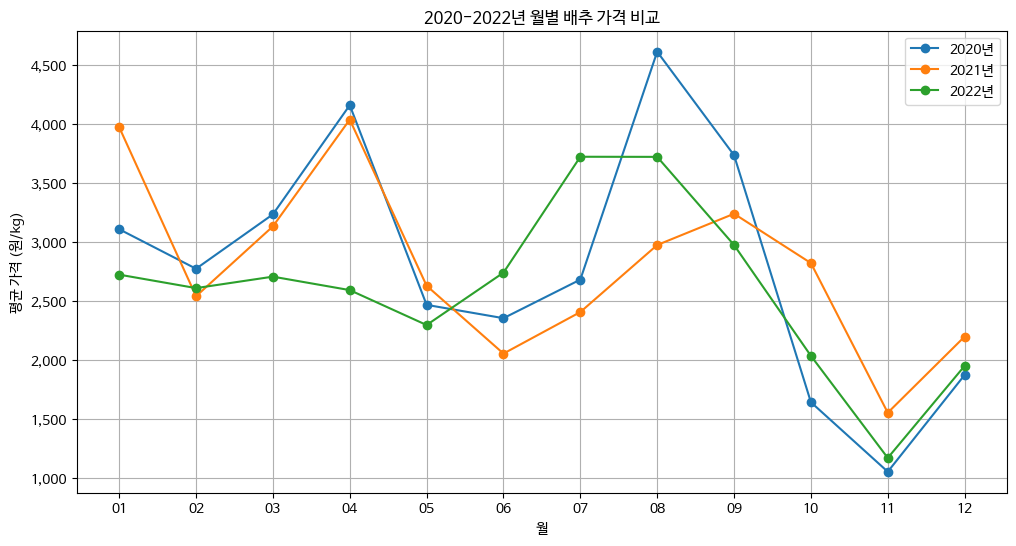

In [ ]:
# 2020, 2021, 2022ÎÖÑ ÏõîÎ≥Ñ ÌèâÍ∑† Í∞ÄÍ≤© Îç∞Ïù¥ÌÑ∞
months = monthly_avg2020.index
price_2020 = monthly_avg2020.values
price_2021 = monthly_avg2021.values
price_2022 = monthly_avg2022.values

# Í∑∏ÎûòÌîÑ ÏÉùÏÑ±
plt.figure(figsize=(12, 6))
plt.plot(months, price_2020, marker='o', linestyle='-', label='2020ÎÖÑ')
plt.plot(months, price_2021, marker='o', linestyle='-', label='2021ÎÖÑ')
plt.plot(months, price_2022, marker='o', linestyle='-', label='2022ÎÖÑ')

# Í∑∏ÎûòÌîÑ Ï†úÎ™© Î∞è Ï∂ï Î†àÏù¥Î∏î ÏÑ§Ï†ï
plt.title('2020-2022ÎÖÑ ÏõîÎ≥Ñ Î∞∞Ï∂î Í∞ÄÍ≤© ÎπÑÍµê')
plt.xlabel('Ïõî')
plt.ylabel('ÌèâÍ∑† Í∞ÄÍ≤© (Ïõê/kg)')
plt.grid(True)
plt.legend()

# yÏ∂ï Îã®ÏúÑÎ•º "Ïõê"ÏúºÎ°ú ÌëúÏãú
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: format(int(x), ',')))

plt.show()

Ï∂îÏ†ïÎêòÎäî Í∏∞ÏÉÅ Ïù¥Î≤§Ìä∏Îì§

* 2020ÎÖÑ 8Ïõî: Ïû•Îßà ÎòêÎäî ÌÉúÌíçÏúºÎ°ú Ïù∏Ìïú Í≥µÍ∏â Î∂ÄÏ°±
* 2021ÎÖÑ 4Ïõî: Ïù¥ÏÉÅ Ï†ÄÏò® ÎòêÎäî Í∞ÄÎ≠ÑÏúºÎ°ú Ïù∏Ìïú ÏûëÌô© Î∂ÄÏßÑ
* 2022ÎÖÑ 7Ïõî: Í∑πÌïú Ìè≠Ïóº ÎòêÎäî ÏßëÏ§ëÌò∏Ïö∞
* Í∞Å Ïó∞ÎèÑ 11Ïõî: ÎπÑÍµêÏ†Å ÏùºÍ¥ÄÎêú Ï†ÄÍ∞Ä (ÍπÄÏû•Ï≤† ÏàòÌôïÍ∏∞)

# 23ÎÖÑ Î∞∞Ï∂î Í∞ÄÍ≤©

1. ÏµúÍ≥†Í∞Ä Î∞úÏÉù ÏõîÏùò ÏôÑÏ†ÑÌïú Î¨¥ÏûëÏúÑÏÑ±

    * 2020ÎÖÑ: 8Ïõî (Ïó¨Î¶ÑÏ≤†) - 4,613Ïõê
    * 2021ÎÖÑ: 4Ïõî (Î¥ÑÏ≤†) - 4,037Ïõê
    * 2022ÎÖÑ: 7Ïõî (Ïó¨Î¶ÑÏ≤†) - 3,722Ïõê
    * 2023ÎÖÑ: 1Ïõî (Í≤®Ïö∏Ï≤†) - 3,748Ïõê

    &rightarrow; Í≥ÑÏ†àÏÑ±Ïù¥ Ï†ÑÌòÄ ÏóÜÏùå! Î™®Îì† Í≥ÑÏ†àÏóêÏÑú ÏµúÍ≥†Í∞Ä Î∞úÏÉù Í∞ÄÎä•

2. ÏòàÏ∏°Ïù¥ Í∞ÄÏû• Ïñ¥Î†§Ïö¥ Ïõî TOP 5

    * 10Ïõî (Î≥ÄÎèôÍ≥ÑÏàò 22.8%) - 1,642Ïõê ‚Üí 2,822Ïõê ‚Üí 2,035Ïõê ‚Üí 1,717Ïõê
    * 4Ïõî (Î≥ÄÎèôÍ≥ÑÏàò 22.1%) - 4,161Ïõê ‚Üí 4,037Ïõê ‚Üí 2,592Ïõê ‚Üí 2,641Ïõê
    * 8Ïõî (Î≥ÄÎèôÍ≥ÑÏàò 20.3%) - 4,613Ïõê ‚Üí 2,975Ïõê ‚Üí 3,721Ïõê ‚Üí 2,796Ïõê
    * 9Ïõî (Î≥ÄÎèôÍ≥ÑÏàò 17.2%) - 3,735Ïõê ‚Üí 3,239Ïõê ‚Üí 2,974Ïõê ‚Üí 2,279Ïõê
    * 7Ïõî (Î≥ÄÎèôÍ≥ÑÏàò 16.8%) - 2,682Ïõê ‚Üí 2,406Ïõê ‚Üí 3,722Ïõê ‚Üí 2,899Ïõê

3. ÏÉÅÎåÄÏ†ÅÏúºÎ°ú ÏïàÏ†ïÏ†ÅÏù∏ Ïõî

    * 12Ïõî (Î≥ÄÎèôÍ≥ÑÏàò 6.0%) - ÍπÄÏû• ÌõÑ ÏïàÏ†ïÍ∏∞
    * 2Ïõî (Î≥ÄÎèôÍ≥ÑÏàò 6.1%) - Í≤®Ïö∏Ï≤† Ï†ÄÏû•Î∞∞Ï∂î ÏãúÍ∏∞
    * 1Ïõî (Î≥ÄÎèôÍ≥ÑÏàò 14.7%) - ÏÉÅÎåÄÏ†ÅÏúºÎ°ú ÏïàÏ†ï

In [ ]:
data2023 = pd.read_csv("/content/baechu_data_2023.csv")
year_baechu_analysis(2023, data2023)

=== 2023ÎÖÑ Í∏∞Î≥∏ Ï†ïÎ≥¥ ===
Ï¥ù Í±∞Îûò Í∏∞Î°ù: 80740 Í±¥
ÎÇ†Ïßú Î≤îÏúÑ: 2023-01-03 ~ 2023-12-30
Ï¥ù Í±∞ÎûòÏùºÏàò: 296

=== Ïó∞ÎèÑÎ≥Ñ kgÎãπ Í∞ÄÍ≤© ÌÜµÍ≥Ñ ===
ÌèâÍ∑†: 2177Ïõê/kg
Ï§ëÏïôÍ∞í: 910.0Ïõê/kg
ÏµúÏ†Ä: 10.0Ïõê/kg
ÏµúÍ≥†: 180412.5Ïõê/kg
ÌëúÏ§ÄÌé∏Ï∞®: 3583Ïõê/kg

=== 2021ÎÖÑ ÏõîÎ≥Ñ ÌèâÍ∑† kgÎãπ Í∞ÄÍ≤© ===
01Ïõî: 3748.0Ïõê/kg
02Ïõî: 2336.0Ïõê/kg
03Ïõî: 2139.0Ïõê/kg
04Ïõî: 2641.0Ïõê/kg
05Ïõî: 1700.0Ïõê/kg
06Ïõî: 1855.0Ïõê/kg
07Ïõî: 2899.0Ïõê/kg
08Ïõî: 2796.0Ïõê/kg
09Ïõî: 2279.0Ïõê/kg
10Ïõî: 1717.0Ïõê/kg
11Ïõî: 1353.0Ïõê/kg
12Ïõî: 2058.0Ïõê/kg


In [ ]:
monthly_avg2023 = get_monthly_average(data2023)

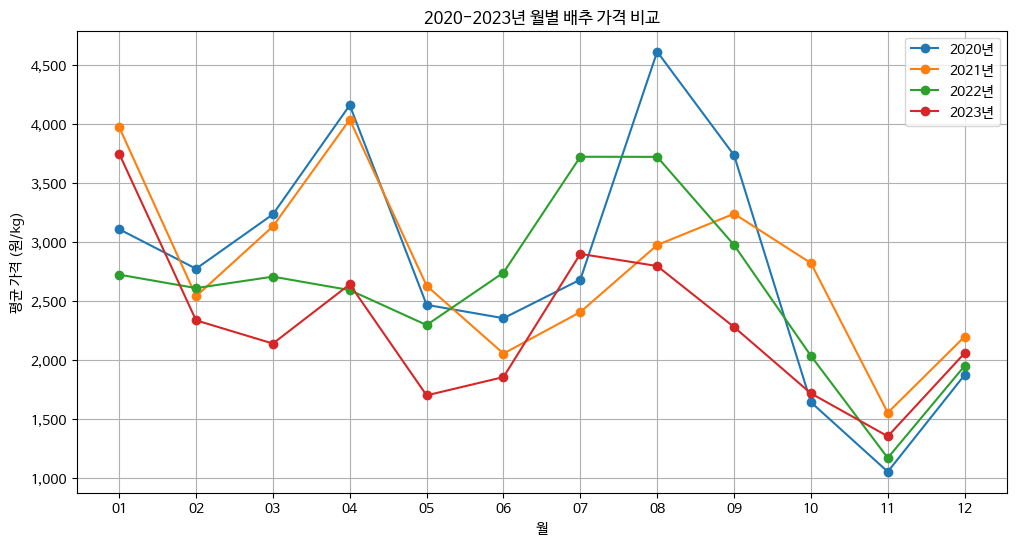

In [ ]:
# 2020, 2021, 2022ÎÖÑ ÏõîÎ≥Ñ ÌèâÍ∑† Í∞ÄÍ≤© Îç∞Ïù¥ÌÑ∞
months = monthly_avg2020.index
price_2020 = monthly_avg2020.values
price_2021 = monthly_avg2021.values
price_2022 = monthly_avg2022.values
price_2023 = monthly_avg2023.values

# Í∑∏ÎûòÌîÑ ÏÉùÏÑ±
plt.figure(figsize=(12, 6))
plt.plot(months, price_2020, marker='o', linestyle='-', label='2020ÎÖÑ')
plt.plot(months, price_2021, marker='o', linestyle='-', label='2021ÎÖÑ')
plt.plot(months, price_2022, marker='o', linestyle='-', label='2022ÎÖÑ')
plt.plot(months, price_2023, marker='o', linestyle='-', label='2023ÎÖÑ')

# Í∑∏ÎûòÌîÑ Ï†úÎ™© Î∞è Ï∂ï Î†àÏù¥Î∏î ÏÑ§Ï†ï
plt.title('2020-2023ÎÖÑ ÏõîÎ≥Ñ Î∞∞Ï∂î Í∞ÄÍ≤© ÎπÑÍµê')
plt.xlabel('Ïõî')
plt.ylabel('ÌèâÍ∑† Í∞ÄÍ≤© (Ïõê/kg)')
plt.grid(True)
plt.legend()

# yÏ∂ï Îã®ÏúÑÎ•º "Ïõê"ÏúºÎ°ú ÌëúÏãú
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: format(int(x), ',')))

plt.show()

Ïö∞ÏÑ†ÏàúÏúÑ 1: Í∑πÌïúÍ∏∞ÏÉÅ Ïù¥Î≤§Ìä∏ Í∞êÏßÄ

* ÌÉúÌíç: 8-9Ïõî Í≥µÍ∏âÎßù Ï∞®Îã®
* ÏßëÏ§ëÌò∏Ïö∞: 7-8Ïõî Ïπ®Ïàò ÌîºÌï¥
* Í∞ÄÎ≠Ñ: 4-5Ïõî ÏÉùÏú° Ï†ÄÌï¥
* Ïù¥ÏÉÅ Í≥†Ïò®/Ï†ÄÏò®: Î™®Îì† Í≥ÑÏ†à

Ïö∞ÏÑ†ÏàúÏúÑ 2: ÏãúÏ∞® Ìö®Í≥º Î™®Îç∏ÎßÅ

* Îã®Í∏∞ ÏãúÏ∞® (1-2Ï£º): ÏàòÌôï ÏßÅÏ†Ñ Í∏∞ÏÉÅ
* Ï§ëÍ∏∞ ÏãúÏ∞® (1-2Í∞úÏõî): ÏÉùÏú°Í∏∞ ÎàÑÏ†Å Í∏∞ÏÉÅ
* Ïû•Í∏∞ ÏãúÏ∞® (3Í∞úÏõî): ÌååÏ¢ÖÍ∏∞Î∂ÄÌÑ∞ ÏàòÌôïÍπåÏßÄ

Ïö∞ÏÑ†ÏàúÏúÑ 3: ÏßÄÏó≠Î≥Ñ Í∞ÄÏ§ë Í∏∞ÏÉÅÎç∞Ïù¥ÌÑ∞

* Ï£ºÏÇ∞ÏßÄÎ≥Ñ Í∏∞ÏÉÅ Ï°∞Í±¥ÏùÑ Í±∞ÎûòÎüâÏúºÎ°ú Í∞ÄÏ§ëÌèâÍ∑†
* Ìï¥ÎÇ®, ÍπÄÏ≤ú, ÏñëÌèâ, ÌèâÏ∞Ω Îì± Ï£ºÏöî ÏÇ∞ÏßÄ

# 24ÎÖÑ Î∞∞Ï∂î Í∞ÄÍ≤©

1. ÏôÑÏ†ÑÌïú Í≥ÑÏ†àÏÑ± Î∂ïÍ¥¥

* ÏµúÍ≥†Í∞Ä Î∞úÏÉùÏõî: 8Ïõî(2020) ‚Üí 4Ïõî(2021) ‚Üí 7Ïõî(2022) ‚Üí 1Ïõî(2023) ‚Üí 9Ïõî(2024)
* Î™®Îì† Í≥ÑÏ†àÏóêÏÑú ÏµúÍ≥†Í∞Ä Î∞úÏÉù Í∞ÄÎä• - Ï†ÑÌÜµÏ†Å Í≥ÑÏ†àÏÑ± Î™®Îç∏ Î¨¥Ïö©

2. Ïú†ÏùºÌïú ÏïàÏ†ï Ìå®ÌÑ¥

* 11Ïõî ÏµúÏ†ÄÍ∞Ä: 5ÎÖÑ Ïó∞ÏÜç (ÍπÄÏû•Ï≤† ÏàòÌôïÍ∏∞)
* 2Ïõî: ÏÉÅÎåÄÏ†ÅÏúºÎ°ú ÏïàÏ†ïÏ†Å (Î≥ÄÎèôÍ≥ÑÏàò 7.6%)

3. ÏòàÏ∏° ÎÇúÏù¥ÎèÑ Í∑πÌïú ÏõîÎì§

* Îß§Ïö∞ÎÜíÏùå (Î≥ÄÎèôÍ≥ÑÏàò >20%): 1Ïõî, 4Ïõî, 5Ïõî, 6Ïõî, 8Ïõî, 10Ïõî
* 8Ïõî ÏµúÎåÄ Î≥ÄÎèô: 1,976Ïõê Ï∞®Ïù¥ (4,613Ïõê ‚Üí 2,637Ïõê)

In [ ]:
data2024 = pd.read_csv("/content/baechu_data_2024.csv")
year_baechu_analysis(2024, data2024)

monthly_avg2024 = get_monthly_average(data2024)

=== 2024ÎÖÑ Í∏∞Î≥∏ Ï†ïÎ≥¥ ===
Ï¥ù Í±∞Îûò Í∏∞Î°ù: 102996 Í±¥
ÎÇ†Ïßú Î≤îÏúÑ: 2024-01-03 ~ 2024-12-31
Ï¥ù Í±∞ÎûòÏùºÏàò: 305

=== Ïó∞ÎèÑÎ≥Ñ kgÎãπ Í∞ÄÍ≤© ÌÜµÍ≥Ñ ===
ÌèâÍ∑†: 2091Ïõê/kg
Ï§ëÏïôÍ∞í: 1180.0Ïõê/kg
ÏµúÏ†Ä: 50.0Ïõê/kg
ÏµúÍ≥†: 110000.0Ïõê/kg
ÌëúÏ§ÄÌé∏Ï∞®: 2804Ïõê/kg

=== 2021ÎÖÑ ÏõîÎ≥Ñ ÌèâÍ∑† kgÎãπ Í∞ÄÍ≤© ===
01Ïõî: 1861.0Ïõê/kg
02Ïõî: 2237.0Ïõê/kg
03Ïõî: 2110.0Ïõê/kg
04Ïõî: 2370.0Ïõê/kg
05Ïõî: 1378.0Ïõê/kg
06Ïõî: 1388.0Ïõê/kg
07Ïõî: 2228.0Ïõê/kg
08Ïõî: 2636.0Ïõê/kg
09Ïõî: 3075.0Ïõê/kg
10Ïõî: 2571.0Ïõê/kg
11Ïõî: 1234.0Ïõê/kg
12Ïõî: 1529.0Ïõê/kg


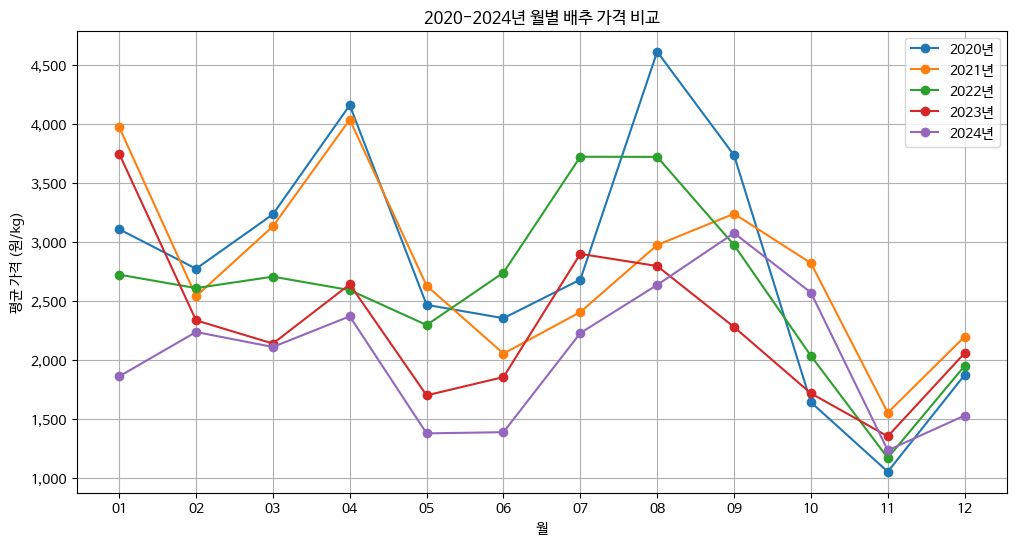

In [ ]:
# 2020-2024ÎÖÑ ÏõîÎ≥Ñ ÌèâÍ∑† Í∞ÄÍ≤© Îç∞Ïù¥ÌÑ∞
months = monthly_avg2020.index
price_2020 = monthly_avg2020.values
price_2021 = monthly_avg2021.values
price_2022 = monthly_avg2022.values
price_2023 = monthly_avg2023.values
price_2024 = monthly_avg2024.values

# Í∑∏ÎûòÌîÑ ÏÉùÏÑ±
plt.figure(figsize=(12, 6))
plt.plot(months, price_2020, marker='o', linestyle='-', label='2020ÎÖÑ')
plt.plot(months, price_2021, marker='o', linestyle='-', label='2021ÎÖÑ')
plt.plot(months, price_2022, marker='o', linestyle='-', label='2022ÎÖÑ')
plt.plot(months, price_2023, marker='o', linestyle='-', label='2023ÎÖÑ')
plt.plot(months, price_2024, marker='o', linestyle='-', label='2024ÎÖÑ')

# Í∑∏ÎûòÌîÑ Ï†úÎ™© Î∞è Ï∂ï Î†àÏù¥Î∏î ÏÑ§Ï†ï
plt.title('2020-2024ÎÖÑ ÏõîÎ≥Ñ Î∞∞Ï∂î Í∞ÄÍ≤© ÎπÑÍµê')
plt.xlabel('Ïõî')
plt.ylabel('ÌèâÍ∑† Í∞ÄÍ≤© (Ïõê/kg)')
plt.grid(True)
plt.legend()

# yÏ∂ï Îã®ÏúÑÎ•º "Ïõê"ÏúºÎ°ú ÌëúÏãú
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: format(int(x), ',')))

plt.show()

In [ ]:
# 3ÎÖÑÍ∞Ñ ÏõîÎ≥Ñ Í∞ÄÍ≤© ÎπÑÍµê
print("=== 2020-2024ÎÖÑ 5ÎÖÑÍ∞Ñ ÏõîÎ≥Ñ Í∞ÄÍ≤© ÎπÑÍµê ===")
print("Ïõî\t2020ÎÖÑ\t2021ÎÖÑ\t2022ÎÖÑ\t2023ÎÖÑ\t2024ÎÖÑ\tÏó∞ÎèÑÍ∞Ñ ÏµúÎåÄÏ∞®Ïù¥")
print("---------------------------------------------------")

for i in range(1, 13):
    month = str(i).zfill(2)
    price2020 = monthly_avg2020.get(month, 0)
    price2021 = monthly_avg2021.get(month, 0)
    price2022 = monthly_avg2022.get(month, 0)
    price2023 = monthly_avg2023.get(month, 0)
    price2024 = monthly_avg2024.get(month, 0)

    prices = [p for p in [price2020, price2021, price2022, price2023, price2024] if p > 0]
    if not prices:
        diff = 0
    else:
        diff = max(prices) - min(prices)

    print(f"{month}Ïõî\t{int(price2020)}\t{int(price2021)}\t{int(price2022)}\t{int(price2023)}\t{int(price2024)}\t{int(diff)}\tÏõê")

# Í∞Å Ïó∞ÎèÑÎ≥Ñ Í∞ÄÍ≤© Î≥ÄÎèôÏÑ± Î∂ÑÏÑù
print("\n=== Ïó∞ÎèÑÎ≥Ñ Í∞ÄÍ≤© Î≥ÄÎèôÏÑ± Î∂ÑÏÑù ===")
for year, data in [
    ('2020', monthly_avg2020),
    ('2021', monthly_avg2021),
    ('2022', monthly_avg2022),
    ('2023', monthly_avg2023),
    ('2024', monthly_avg2024)
    ]:
    max_price = data.max()
    min_price = data.min()
    max_month = data.idxmax()
    min_month = data.idxmin()
    volatility = max_price - min_price
    print(f"{year}ÎÖÑ: ÏµúÍ≥† {max_month}Ïõî({int(max_price)}Ïõê), ÏµúÏ†Ä {min_month}Ïõî({int(min_price)}Ïõê), Î≥ÄÎèôÌè≠ {int(volatility)}Ïõê")

# Í≥ÑÏ†àÏÑ± ÏùºÍ¥ÄÏÑ± Î∂ÑÏÑù
print("\n=== Í≥ÑÏ†àÎ≥Ñ Í∞ÄÍ≤© ÏàúÏúÑ Î≥ÄÌôî ===")
seasons = {
    'Î¥Ñ(3-5Ïõî)': ['03', '04', '05'],
    'Ïó¨Î¶Ñ(6-8Ïõî)': ['06', '07', '08'],
    'Í∞ÄÏùÑ(9-11Ïõî)': ['09', '10', '11'],
    'Í≤®Ïö∏(12-2Ïõî)': ['12', '01', '02']
}

for name, months in seasons.items():
    avg2020 = monthly_avg2020[monthly_avg2020.index.isin(months)].mean()
    avg2021 = monthly_avg2021[monthly_avg2021.index.isin(months)].mean()
    avg2022 = monthly_avg2022[monthly_avg2022.index.isin(months)].mean()
    avg2023 = monthly_avg2022[monthly_avg2023.index.isin(months)].mean()
    avg2024 = monthly_avg2022[monthly_avg2024.index.isin(months)].mean()
    print(f"{name}: 2020ÎÖÑ {int(avg2020)}Ïõê, 2021ÎÖÑ {int(avg2021)}Ïõê, 2022ÎÖÑ {int(avg2022)}Ïõê, 2023ÎÖÑ {int(avg2023)}Ïõê, 2024ÎÖÑ {int(avg2024)}Ïõê")

=== 2020-2022ÎÖÑ 3ÎÖÑÍ∞Ñ ÏõîÎ≥Ñ Í∞ÄÍ≤© ÎπÑÍµê ===
Ïõî	2020ÎÖÑ	2021ÎÖÑ	2022ÎÖÑ	2023ÎÖÑ	2024ÎÖÑ	Ïó∞ÎèÑÍ∞Ñ ÏµúÎåÄÏ∞®Ïù¥
---------------------------------------------------
01Ïõî	3108	3973	2723	3748	1861	2112	Ïõê
02Ïõî	2773	2540	2609	2336	2237	536	Ïõê
03Ïõî	3234	3132	2706	2139	2110	1124	Ïõê
04Ïõî	4159	4037	2592	2641	2370	1789	Ïõê
05Ïõî	2467	2629	2296	1700	1378	1251	Ïõê
06Ïõî	2354	2054	2740	1855	1388	1352	Ïõê
07Ïõî	2681	2406	3722	2899	2228	1494	Ïõê
08Ïõî	4612	2974	3721	2796	2636	1976	Ïõê
09Ïõî	3735	3239	2974	2279	3075	1456	Ïõê
10Ïõî	1642	2821	2035	1717	2571	1179	Ïõê
11Ïõî	1053	1553	1170	1353	1234	500	Ïõê
12Ïõî	1873	2198	1950	2058	1529	669	Ïõê

=== Ïó∞ÎèÑÎ≥Ñ Í∞ÄÍ≤© Î≥ÄÎèôÏÑ± Î∂ÑÏÑù ===
2020ÎÖÑ: ÏµúÍ≥† 08Ïõî(4612Ïõê), ÏµúÏ†Ä 11Ïõî(1053Ïõê), Î≥ÄÎèôÌè≠ 3559Ïõê
2021ÎÖÑ: ÏµúÍ≥† 04Ïõî(4037Ïõê), ÏµúÏ†Ä 11Ïõî(1553Ïõê), Î≥ÄÎèôÌè≠ 2484Ïõê
2022ÎÖÑ: ÏµúÍ≥† 07Ïõî(3722Ïõê), ÏµúÏ†Ä 11Ïõî(1170Ïõê), Î≥ÄÎèôÌè≠ 2552Ïõê
2023ÎÖÑ: ÏµúÍ≥† 01Ïõî(3748Ïõê), ÏµúÏ†Ä 11Ïõî(1353Ïõê), Î≥ÄÎèôÌè≠ 2395Ïõê
2024ÎÖÑ: ÏµúÍ≥† 09Ï

# Í∏∞ÏÉÅÎç∞Ïù¥ÌÑ∞ Ï∂îÍ∞Ä

In [3]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
import warnings
warnings.filterwarnings('ignore')

In [4]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.model_selection import train_test_split, TimeSeriesSplit
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error, r2_score

In [7]:
def load_and_combine_cabbage_data(file_paths):
    """
    Ïó∞ÎèÑÎ≥Ñ Î∞∞Ï∂î Í∞ÄÍ≤© Îç∞Ïù¥ÌÑ∞Î•º ÌïòÎÇòÎ°ú Ìï©ÏπòÍ∏∞

    Parameters:
    file_paths: list - ['baechu_data_2020.csv', 'baechu_data_2021.csv', ...]
    """
    combined_data = []

    for file_path in file_paths:
        try:
            df = pd.read_csv(f"/content/{file_path}")
            print(f"üìÅ {file_path}: {len(df):,}Ìñâ Î°úÎìú")
            combined_data.append(df)
        except FileNotFoundError:
            print(f"‚ùå {file_path} ÌååÏùºÏùÑ Ï∞æÏùÑ Ïàò ÏóÜÏäµÎãàÎã§.")

    if combined_data:
        # Î™®Îì† Îç∞Ïù¥ÌÑ∞ Ìï©ÏπòÍ∏∞
        full_df = pd.concat(combined_data, ignore_index=True)
        print(f"‚úÖ Ï†ÑÏ≤¥ Îç∞Ïù¥ÌÑ∞: {len(full_df):,}Ìñâ ÌÜµÌï© ÏôÑÎ£å")
        return full_df
    else:
        return None

# Î∞∞Ï∂î Îç∞Ïù¥ÌÑ∞ ÌååÏùº Í≤ΩÎ°ú Î¶¨Ïä§Ìä∏
cabbage_files = [
    'baechu_data_2020.csv',
    'baechu_data_2021.csv',
    'baechu_data_2022.csv',
    'baechu_data_2023.csv',
    'baechu_data_2024.csv',
    'baechu_data_2025.csv'  # 2025ÎÖÑ ÏÉÅÎ∞òÍ∏∞
]

# Îç∞Ïù¥ÌÑ∞ Î°úÎìú
cabbage_df = load_and_combine_cabbage_data(cabbage_files)

# Í∏∞Î≥∏ Ï†ïÎ≥¥ ÌôïÏù∏
if cabbage_df is not None:
    print(f"\nüìä ÌÜµÌï© Î∞∞Ï∂î Îç∞Ïù¥ÌÑ∞ Ï†ïÎ≥¥:")
    print(f"   Ìñâ Ïàò: {len(cabbage_df):,}")
    print(f"   Ïó¥ Ïàò: {len(cabbage_df.columns)}")
    print(f"   Í∏∞Í∞Ñ: {cabbage_df['AUC_YMD'].min()} ~ {cabbage_df['AUC_YMD'].max()}")
    print(f"   Ï£ºÏöî ÏÇ∞ÏßÄ: {cabbage_df['MTC_NM'].value_counts().head().index.tolist()}")

üìÅ baechu_data_2020.csv: 66,307Ìñâ Î°úÎìú
üìÅ baechu_data_2021.csv: 69,367Ìñâ Î°úÎìú
üìÅ baechu_data_2022.csv: 65,219Ìñâ Î°úÎìú
üìÅ baechu_data_2023.csv: 80,740Ìñâ Î°úÎìú
üìÅ baechu_data_2024.csv: 102,996Ìñâ Î°úÎìú
üìÅ baechu_data_2025.csv: 43,428Ìñâ Î°úÎìú
‚úÖ Ï†ÑÏ≤¥ Îç∞Ïù¥ÌÑ∞: 428,057Ìñâ ÌÜµÌï© ÏôÑÎ£å

üìä ÌÜµÌï© Î∞∞Ï∂î Îç∞Ïù¥ÌÑ∞ Ï†ïÎ≥¥:
   Ìñâ Ïàò: 428,057
   Ïó¥ Ïàò: 25
   Í∏∞Í∞Ñ: 2020-01-03 ~ 2025-06-30
   Ï£ºÏöî ÏÇ∞ÏßÄ: ['Ï†ÑÎùºÎÇ®ÎèÑ Ìï¥ÎÇ®Íµ∞', 'Í≤ΩÏÉÅÎ∂ÅÎèÑ ÍπÄÏ≤úÏãú', 'Í∞ïÏõêÎèÑ ÌèâÏ∞ΩÍµ∞', 'Í≤ΩÍ∏∞ÎèÑ ÏñëÌèâÍµ∞', 'Ï†ÑÎùºÎÇ®ÎèÑ ÏßÑÎèÑÍµ∞']


In [8]:
def preprocess_cabbage_data(df):
    """
    Î∞∞Ï∂î Í∞ÄÍ≤© Îç∞Ïù¥ÌÑ∞ Ï†ÑÏ≤òÎ¶¨ Ìï®Ïàò
    """
    # ÎÇ†Ïßú Ïª¨Îüº Î≥ÄÌôò
    df['AUC_YMD'] = pd.to_datetime(df['AUC_YMD'])
    df['year'] = df['AUC_YMD'].dt.year
    df['month'] = df['AUC_YMD'].dt.month

    # Í∞ÄÍ≤© Îç∞Ïù¥ÌÑ∞ Ï†ïÎ¶¨ (Ïù¥ÏÉÅÏπò Ï†úÍ±∞)
    df = df[df['PRCE_PER_KG'] > 0]
    df = df[df['PRCE_PER_KG'] < 50000]  # Í∑πÎã®Ï†Å Ïù¥ÏÉÅÏπò Ï†úÍ±∞

    print(f"‚úÖ Ï†ÑÏ≤òÎ¶¨ ÌõÑ Îç∞Ïù¥ÌÑ∞: {len(df):,}Ìñâ")
    return df

# Îç∞Ïù¥ÌÑ∞ Ï†ÑÏ≤òÎ¶¨ Ïã§Ìñâ
if cabbage_df is not None:
    cabbage_df = preprocess_cabbage_data(cabbage_df)

‚úÖ Ï†ÑÏ≤òÎ¶¨ ÌõÑ Îç∞Ïù¥ÌÑ∞: 427,870Ìñâ


‚úÖ ÏõîÎ≥Ñ Í∞ÄÍ≤© Îç∞Ïù¥ÌÑ∞: 66Í∞úÏõî


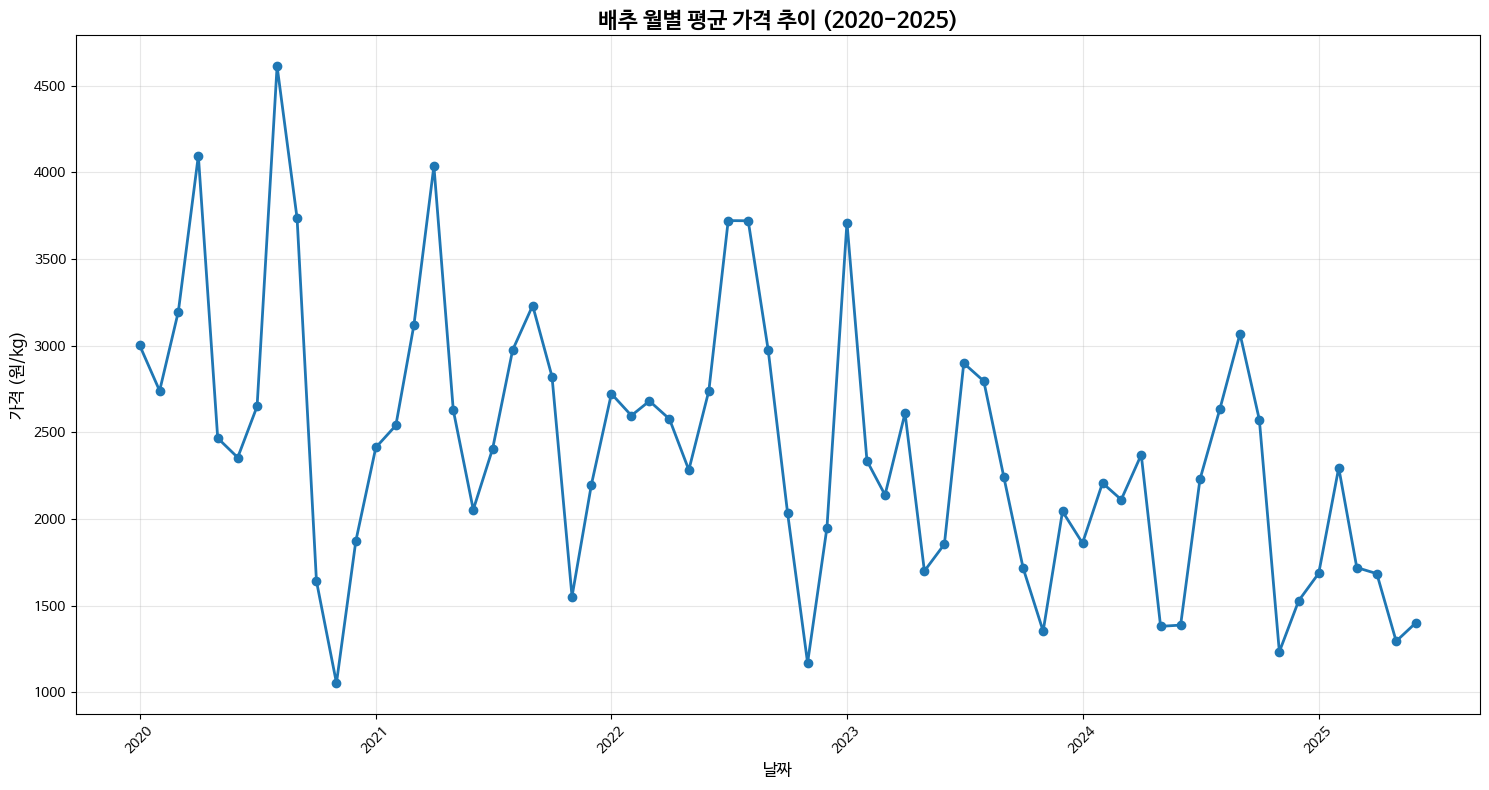


üìä ÏõîÎ≥Ñ Í∞ÄÍ≤© Í∏∞Î≥∏ ÌÜµÍ≥Ñ:
count      66.000000
mean     2403.939394
std       768.734102
min      1054.000000
25%      1856.500000
50%      2363.000000
75%      2782.000000
max      4613.000000
Name: mean_price, dtype: float64


In [9]:
def calculate_monthly_prices(df):
    """
    ÏõîÎ≥Ñ ÌèâÍ∑† Í∞ÄÍ≤© Í≥ÑÏÇ∞
    """
    monthly_prices = df.groupby(['year', 'month'])['PRCE_PER_KG'].agg([
        'mean', 'median', 'std', 'count'
    ]).round(0)

    monthly_prices.columns = ['mean_price', 'median_price', 'std_price', 'transaction_count']
    monthly_prices = monthly_prices.reset_index()

    # ÎÇ†Ïßú Ïª¨Îüº ÏÉùÏÑ±
    monthly_prices['date'] = pd.to_datetime(monthly_prices[['year', 'month']].assign(day=1))

    print(f"‚úÖ ÏõîÎ≥Ñ Í∞ÄÍ≤© Îç∞Ïù¥ÌÑ∞: {len(monthly_prices)}Í∞úÏõî")
    return monthly_prices

# ÏõîÎ≥Ñ Í∞ÄÍ≤© Í≥ÑÏÇ∞
if cabbage_df is not None:
    monthly_price_df = calculate_monthly_prices(cabbage_df)

    # ÏõîÎ≥Ñ Í∞ÄÍ≤© ÏãúÍ∞ÅÌôî
    plt.figure(figsize=(15, 8))
    plt.plot(monthly_price_df['date'], monthly_price_df['mean_price'],
             marker='o', linewidth=2, markersize=6)
    plt.title('Î∞∞Ï∂î ÏõîÎ≥Ñ ÌèâÍ∑† Í∞ÄÍ≤© Ï∂îÏù¥ (2020-2025)', fontsize=16, fontweight='bold')
    plt.xlabel('ÎÇ†Ïßú', fontsize=12)
    plt.ylabel('Í∞ÄÍ≤© (Ïõê/kg)', fontsize=12)
    plt.grid(True, alpha=0.3)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

    # Í∏∞Î≥∏ ÌÜµÍ≥Ñ
    print(f"\nüìä ÏõîÎ≥Ñ Í∞ÄÍ≤© Í∏∞Î≥∏ ÌÜµÍ≥Ñ:")
    print(monthly_price_df['mean_price'].describe())

In [10]:
def load_weather_data(file_path):
    """
    Í∏∞ÏÉÅ Îç∞Ïù¥ÌÑ∞ Î°úÎìú Î∞è Í∏∞Î≥∏ Ï†ÑÏ≤òÎ¶¨
    """
    try:
        weather_df = pd.read_csv(file_path)
        weather_df['ÏùºÏãú'] = pd.to_datetime(weather_df['ÏùºÏãú'])
        weather_df['year'] = weather_df['ÏùºÏãú'].dt.year
        weather_df['month'] = weather_df['ÏùºÏãú'].dt.month

        # Í≤∞Ï∏°Ïπò Ï≤òÎ¶¨
        weather_df['ÏùºÍ∞ïÏàòÎüâ(mm)'] = weather_df['ÏùºÍ∞ïÏàòÎüâ(mm)'].fillna(0)
        weather_df['Ìï©Í≥Ñ ÏùºÏ°∞ÏãúÍ∞Ñ(hr)'] = weather_df['Ìï©Í≥Ñ ÏùºÏ°∞ÏãúÍ∞Ñ(hr)'].fillna(0)

        print(f"‚úÖ Í∏∞ÏÉÅ Îç∞Ïù¥ÌÑ∞ Î°úÎìú: {len(weather_df):,}Ìñâ")
        print(f"   Í¥ÄÏ∏°ÏßÄÏ†ê: {weather_df['ÏßÄÏ†êÎ™Ö'].unique()}")
        print(f"   Í∏∞Í∞Ñ: {weather_df['ÏùºÏãú'].min()} ~ {weather_df['ÏùºÏãú'].max()}")

        return weather_df
    except FileNotFoundError:
        print("‚ùå Í∏∞ÏÉÅ Îç∞Ïù¥ÌÑ∞ ÌååÏùºÏùÑ Ï∞æÏùÑ Ïàò ÏóÜÏäµÎãàÎã§.")
        return None

# Í∏∞ÏÉÅ Îç∞Ïù¥ÌÑ∞ Î°úÎìú
weather_df = load_weather_data('weather_data.csv')

‚úÖ Í∏∞ÏÉÅ Îç∞Ïù¥ÌÑ∞ Î°úÎìú: 6,020Ìñâ
   Í¥ÄÏ∏°ÏßÄÏ†ê: ['Í∞ïÎ¶â' 'ÏñëÌèâ' 'Ìï¥ÎÇ®']
   Í∏∞Í∞Ñ: 2020-01-01 00:00:00 ~ 2025-06-30 00:00:00


In [11]:
def detect_extreme_weather(weather_df):
    """
    Í∑πÌïúÍ∏∞ÏÉÅ Ïù¥Î≤§Ìä∏ ÌÉêÏßÄ Î∞è ÌîåÎûòÍ∑∏ ÏÉùÏÑ±
    """
    df = weather_df.copy()

    # Í∑πÌïúÍ∏∞ÏÉÅ ÏûÑÍ≥ÑÍ∞í ÏÑ§Ï†ï
    df['Ìè≠Ïóº'] = (df['ÏµúÍ≥†Í∏∞Ïò®(¬∞C)'] >= 35).astype(int)
    df['ÌïúÌåå'] = (df['ÏµúÏ†ÄÍ∏∞Ïò®(¬∞C)'] <= -10).astype(int)
    df['ÏßëÏ§ëÌò∏Ïö∞'] = (df['ÏùºÍ∞ïÏàòÎüâ(mm)'] >= 80).astype(int)
    df['Í∞ÄÎ≠Ñ'] = (df['ÏùºÍ∞ïÏàòÎüâ(mm)'] < 1).astype(int)

    # Í∑πÌïúÍ∏∞ÏÉÅ Ï¥ùÌï©
    df['Í∑πÌïúÍ∏∞ÏÉÅ_Ï¥ùÌï©'] = df['Ìè≠Ïóº'] + df['ÌïúÌåå'] + df['ÏßëÏ§ëÌò∏Ïö∞']

    print("‚úÖ Í∑πÌïúÍ∏∞ÏÉÅ Ïù¥Î≤§Ìä∏")
    print(f"   Ìè≠ÏóºÏùº: {df['Ìè≠Ïóº'].sum():,}Ïùº")
    print(f"   ÌïúÌååÏùº: {df['ÌïúÌåå'].sum():,}Ïùº")
    print(f"   ÏßëÏ§ëÌò∏Ïö∞Ïùº: {df['ÏßëÏ§ëÌò∏Ïö∞'].sum():,}Ïùº")

    return df

# Í∑πÌïúÍ∏∞ÏÉÅ ÌÉêÏßÄ
if weather_df is not None:
    weather_df = detect_extreme_weather(weather_df)

‚úÖ Í∑πÌïúÍ∏∞ÏÉÅ Ïù¥Î≤§Ìä∏
   Ìè≠ÏóºÏùº: 48Ïùº
   ÌïúÌååÏùº: 117Ïùº
   ÏßëÏ§ëÌò∏Ïö∞Ïùº: 41Ïùº


In [12]:
def calculate_monthly_weather_features(weather_df):
    """
    ÏõîÎ≥Ñ Í∏∞ÏÉÅ ÌäπÏÑ± Í≥ÑÏÇ∞ (Îã§Ï§ë ÏßÄÏ†ê ÌÜµÌï©)
    """
    # ÏßÄÏ†êÎ≥Ñ ÏõîÎ≥Ñ ÏßëÍ≥Ñ
    monthly_weather_by_station = weather_df.groupby(['ÏßÄÏ†êÎ™Ö', 'year', 'month']).agg({
        'ÌèâÍ∑†Í∏∞Ïò®(¬∞C)': 'mean',
        'ÏµúÏ†ÄÍ∏∞Ïò®(¬∞C)': 'min',
        'ÏµúÍ≥†Í∏∞Ïò®(¬∞C)': 'max',
        'ÏùºÍ∞ïÏàòÎüâ(mm)': 'sum',
        'ÌèâÍ∑† ÏÉÅÎåÄÏäµÎèÑ(%)': 'mean',
        'Ìï©Í≥Ñ ÏùºÏ°∞ÏãúÍ∞Ñ(hr)': 'mean',
        'Ìè≠Ïóº': 'sum',
        'ÌïúÌåå': 'sum',
        'ÏßëÏ§ëÌò∏Ïö∞': 'sum',
        'Í∞ÄÎ≠Ñ': 'sum',
        'Í∑πÌïúÍ∏∞ÏÉÅ_Ï¥ùÌï©': 'sum'
    }).round(2)

    # Ïª¨ÎüºÎ™Ö Ï†ïÎ¶¨
    monthly_weather_by_station.columns = [
        'avg_temp', 'min_temp', 'max_temp', 'total_rain', 'avg_humidity',
        'avg_sunshine', 'heatwave_days', 'coldwave_days', 'heavy_rain_days',
        'drought_days', 'extreme_events_total'
    ]

    monthly_weather_by_station = monthly_weather_by_station.reset_index()

    # Îã§Ï§ë ÏßÄÏ†ê ÌèâÍ∑† Í≥ÑÏÇ∞ (ÏßÄÏ†êÎ≥Ñ ÎèôÏùº Í∞ÄÏ§ëÏπò)
    monthly_weather = monthly_weather_by_station.groupby(['year', 'month']).agg({
        'avg_temp': 'mean',
        'min_temp': 'min',  # ÏµúÏ†Ä Í∏∞Ïò®ÏùÄ ÏµúÏÜåÍ∞í
        'max_temp': 'max',  # ÏµúÍ≥† Í∏∞Ïò®ÏùÄ ÏµúÎåÄÍ∞í
        'total_rain': 'mean',  # Í∞ïÏàòÎüâÏùÄ ÌèâÍ∑†
        'avg_humidity': 'mean',
        'avg_sunshine': 'mean',
        'heatwave_days': 'sum',  # Í∑πÌïúÍ∏∞ÏÉÅÏùÄ Ìï©Í≥Ñ
        'coldwave_days': 'sum',
        'heavy_rain_days': 'sum',
        'drought_days': 'mean',
        'extreme_events_total': 'sum'
    }).round(2)

    monthly_weather = monthly_weather.reset_index()

    # Ï∂îÍ∞Ä ÌååÏÉù Î≥ÄÏàò ÏÉùÏÑ±
    monthly_weather['temp_range'] = monthly_weather['max_temp'] - monthly_weather['min_temp']
    monthly_weather['date'] = pd.to_datetime(monthly_weather[['year', 'month']].assign(day=1))

    print(f"‚úÖ ÏõîÎ≥Ñ Í∏∞ÏÉÅ ÌäπÏÑ± Í≥ÑÏÇ∞ ÏôÑÎ£å: {len(monthly_weather)}Í∞úÏõî")
    return monthly_weather

# ÏõîÎ≥Ñ Í∏∞ÏÉÅ ÌäπÏÑ± Í≥ÑÏÇ∞
if weather_df is not None:
    monthly_weather_df = calculate_monthly_weather_features(weather_df)

‚úÖ ÏõîÎ≥Ñ Í∏∞ÏÉÅ ÌäπÏÑ± Í≥ÑÏÇ∞ ÏôÑÎ£å: 66Í∞úÏõî


In [13]:
def combine_price_weather_data(price_df, weather_df):
    """
    Í∞ÄÍ≤© Îç∞Ïù¥ÌÑ∞ÏôÄ Í∏∞ÏÉÅ Îç∞Ïù¥ÌÑ∞ Í≤∞Ìï©
    """
    # Í∞ÄÍ≤© Îç∞Ïù¥ÌÑ∞ÏôÄ Í∏∞ÏÉÅ Îç∞Ïù¥ÌÑ∞ Í≤∞Ìï©
    combined_df = pd.merge(
        price_df,
        weather_df,
        on=['year', 'month'],
        how='inner'
    )

    print(f"‚úÖ Í∞ÄÍ≤©-Í∏∞ÏÉÅ Îç∞Ïù¥ÌÑ∞ Í≤∞Ìï© ÏôÑÎ£å: {len(combined_df)}Í∞úÏõî")
    return combined_df

# Îç∞Ïù¥ÌÑ∞ Í≤∞Ìï©
if 'monthly_price_df' in locals() and 'monthly_weather_df' in locals():
    final_df = combine_price_weather_data(monthly_price_df, monthly_weather_df)

    # Í≤∞Ìï©Îêú Îç∞Ïù¥ÌÑ∞ ÌôïÏù∏
    print(f"\nüìä ÏµúÏ¢Ö Îç∞Ïù¥ÌÑ∞ Ï†ïÎ≥¥:")
    print(f"   Í∏∞Í∞Ñ: {final_df['date_x'].min()} ~ {final_df['date_x'].max()}")
    print(f"   Î≥ÄÏàò Ïàò: {len(final_df.columns)}")
    print(f"   ÏôÑÏ†ÑÌïú Îç∞Ïù¥ÌÑ∞: {len(final_df)}Í∞úÏõî")

‚úÖ Í∞ÄÍ≤©-Í∏∞ÏÉÅ Îç∞Ïù¥ÌÑ∞ Í≤∞Ìï© ÏôÑÎ£å: 66Í∞úÏõî

üìä ÏµúÏ¢Ö Îç∞Ïù¥ÌÑ∞ Ï†ïÎ≥¥:
   Í∏∞Í∞Ñ: 2020-01-01 00:00:00 ~ 2025-06-01 00:00:00
   Î≥ÄÏàò Ïàò: 20
   ÏôÑÏ†ÑÌïú Îç∞Ïù¥ÌÑ∞: 66Í∞úÏõî


In [14]:
def create_advanced_features(df):
    """
    Í≥†Í∏â ÌäπÏÑ± ÏÉùÏÑ± (ÏãúÏ∞®, ÏÉÅÌò∏ÏûëÏö©, Í≥ÑÏ†àÏÑ± Îì±)
    """
    df = df.sort_values(['year', 'month']).reset_index(drop=True)

    # 1. ÏãúÏ∞® ÌäπÏÑ± (1-3Í∞úÏõî Ï†Ñ Í∏∞ÏÉÅ Ï°∞Í±¥)
    for lag in [1, 2, 3]:
        df[f'avg_temp_lag{lag}'] = df['avg_temp'].shift(lag)
        df[f'extreme_events_lag{lag}'] = df['extreme_events_total'].shift(lag)
        df[f'total_rain_lag{lag}'] = df['total_rain'].shift(lag)

    # 2. Í≥ÑÏ†àÏÑ± ÌäπÏÑ±
    df['is_winter'] = df['month'].isin([12, 1, 2]).astype(int)
    df['is_spring'] = df['month'].isin([3, 4, 5]).astype(int)
    df['is_summer'] = df['month'].isin([6, 7, 8]).astype(int)
    df['is_autumn'] = df['month'].isin([9, 10, 11]).astype(int)
    df['is_kimjang'] = (df['month'] == 11).astype(int)  # ÍπÄÏû•Ï≤†

    # 3. Ïù¥ÎèôÌèâÍ∑† ÌäπÏÑ± (3Í∞úÏõî)
    df['price_ma3'] = df['mean_price'].rolling(window=3, min_periods=1).mean()
    df['temp_ma3'] = df['avg_temp'].rolling(window=3, min_periods=1).mean()
    df['extreme_ma3'] = df['extreme_events_total'].rolling(window=3, min_periods=1).mean()

    # 4. ÏÉÅÌò∏ÏûëÏö© ÌäπÏÑ±
    df['temp_rain_interaction'] = df['avg_temp'] * df['total_rain'] / 1000
    df['extreme_summer_interaction'] = df['extreme_events_total'] * df['is_summer']
    df['extreme_winter_interaction'] = df['extreme_events_total'] * df['is_winter']

    # 5. Í∏∞ÏÉÅ ÏúÑÌóòÎèÑ Ï†êÏàò
    df['weather_risk_score'] = (
        df['extreme_events_total'] * 10 +
        (df['total_rain'] > 200).astype(int) * 5 +
        (df['total_rain'] < 20).astype(int) * 5 +
        (df['avg_temp'] > 30).astype(int) * 3 +
        (df['avg_temp'] < -5).astype(int) * 3
    )

    # 6. Í≥ÑÏ†àÎ≥Ñ Ïò®ÎèÑ Ìé∏Ï∞®
    seasonal_optimal_temp = {1: 3, 2: 5, 3: 10, 4: 16, 5: 20, 6: 24,
                           7: 26, 8: 27, 9: 23, 10: 18, 11: 12, 12: 5}
    df['temp_deviation'] = abs(df['avg_temp'] - df['month'].map(seasonal_optimal_temp))

    print(f"‚úÖ Í≥†Í∏â ÌäπÏÑ± ÏÉùÏÑ± ÏôÑÎ£å: {len(df.columns)}Í∞ú Î≥ÄÏàò")
    return df

# Í≥†Í∏â ÌäπÏÑ± ÏÉùÏÑ±
if 'final_df' in locals():
    final_df = create_advanced_features(final_df)

‚úÖ Í≥†Í∏â ÌäπÏÑ± ÏÉùÏÑ± ÏôÑÎ£å: 42Í∞ú Î≥ÄÏàò


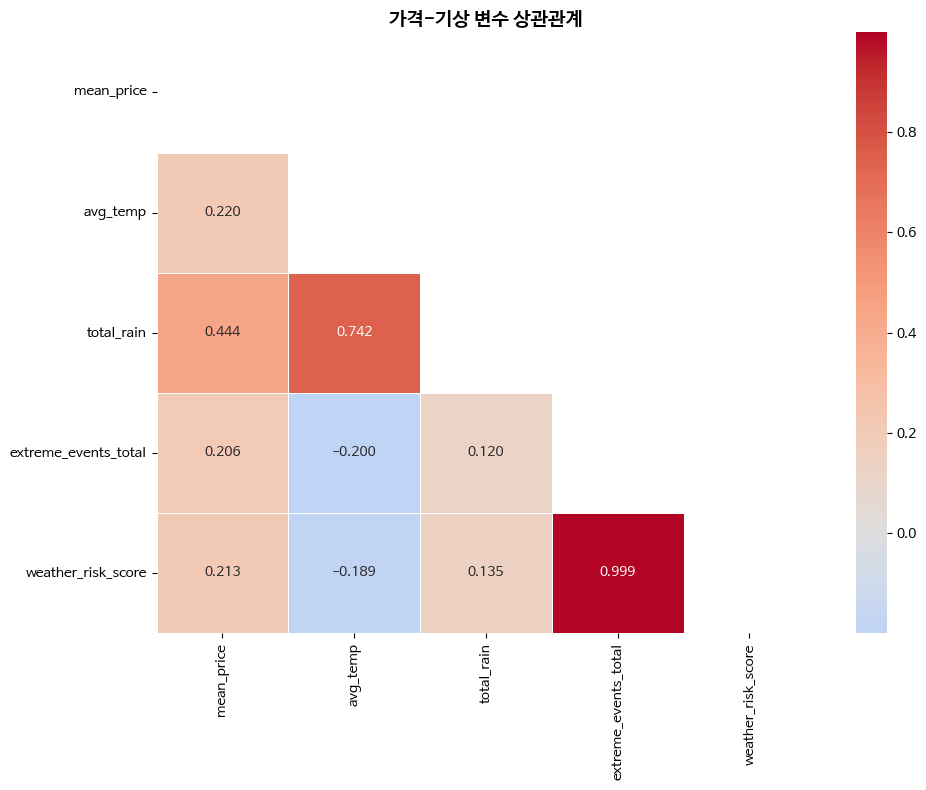

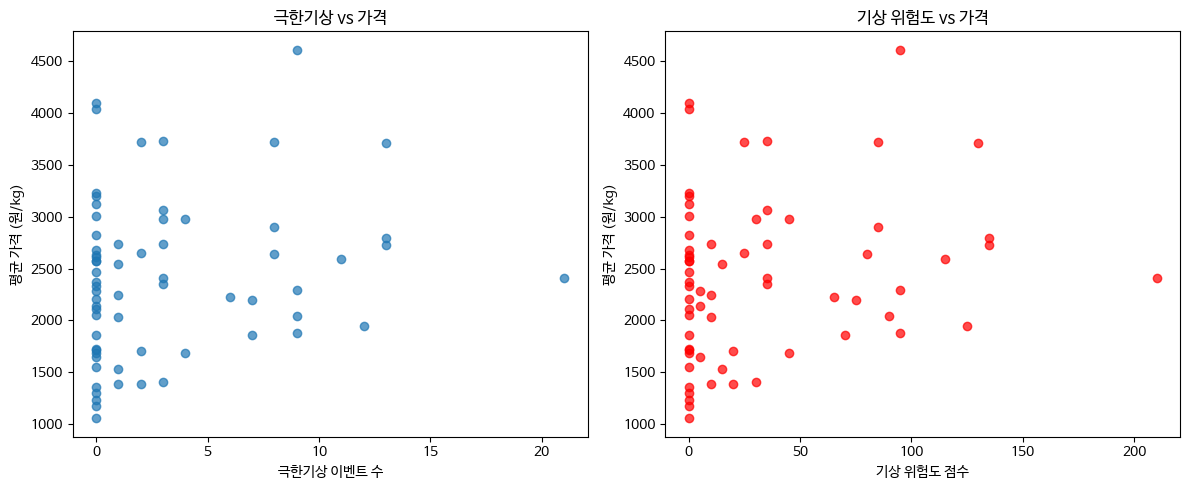

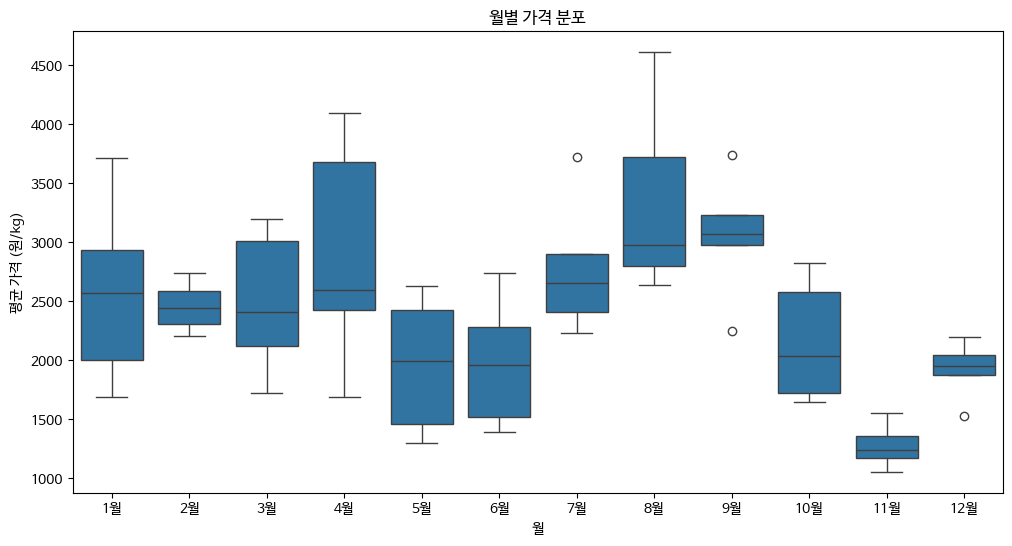

‚úÖ ÌÉêÏÉâÏ†Å Îç∞Ïù¥ÌÑ∞ Î∂ÑÏÑù ÏôÑÎ£å


In [19]:
def perform_eda(df):
    """
    ÌÉêÏÉâÏ†Å Îç∞Ïù¥ÌÑ∞ Î∂ÑÏÑù
    """
    # 1. Í∞ÄÍ≤©Í≥º Í∏∞ÏÉÅ Î≥ÄÏàò Í∞Ñ ÏÉÅÍ¥ÄÍ¥ÄÍ≥Ñ
    weather_cols = ['avg_temp', 'total_rain', 'extreme_events_total', 'weather_risk_score']
    correlation = df[['mean_price'] + weather_cols].corr()

    plt.figure(figsize=(10, 8))
    mask = np.zeros_like(correlation, dtype=np.bool)
    mask[np.triu_indices_from(mask)] = True
    sns.heatmap(correlation,
                annot=True,
                cmap='coolwarm',
                center=0,
                fmt='.3f',
                linewidths=.5,
                mask=mask)
    plt.title('Í∞ÄÍ≤©-Í∏∞ÏÉÅ Î≥ÄÏàò ÏÉÅÍ¥ÄÍ¥ÄÍ≥Ñ', fontsize=14, fontweight='bold')
    plt.tight_layout()
    plt.show()

    # 2. Í∑πÌïúÍ∏∞ÏÉÅ vs Í∞ÄÍ≤© ÏÇ∞Ï†êÎèÑ
    plt.figure(figsize=(12, 5))

    plt.subplot(1, 2, 1)
    plt.scatter(df['extreme_events_total'], df['mean_price'], alpha=0.7)
    plt.xlabel('Í∑πÌïúÍ∏∞ÏÉÅ Ïù¥Î≤§Ìä∏ Ïàò')
    plt.ylabel('ÌèâÍ∑† Í∞ÄÍ≤© (Ïõê/kg)')
    plt.title('Í∑πÌïúÍ∏∞ÏÉÅ vs Í∞ÄÍ≤©')

    plt.subplot(1, 2, 2)
    plt.scatter(df['weather_risk_score'], df['mean_price'], alpha=0.7, color='red')
    plt.xlabel('Í∏∞ÏÉÅ ÏúÑÌóòÎèÑ Ï†êÏàò')
    plt.ylabel('ÌèâÍ∑† Í∞ÄÍ≤© (Ïõê/kg)')
    plt.title('Í∏∞ÏÉÅ ÏúÑÌóòÎèÑ vs Í∞ÄÍ≤©')

    plt.tight_layout()
    plt.show()

    # 3. ÏõîÎ≥Ñ Í∞ÄÍ≤© Î∞ïÏä§ÌîåÎ°Ø
    plt.figure(figsize=(12, 6))
    sns.boxplot(data=df, x='month', y='mean_price')
    plt.title('ÏõîÎ≥Ñ Í∞ÄÍ≤© Î∂ÑÌè¨')
    plt.xlabel('Ïõî')
    plt.ylabel('ÌèâÍ∑† Í∞ÄÍ≤© (Ïõê/kg)')
    plt.xticks(range(12), ['1Ïõî', '2Ïõî', '3Ïõî', '4Ïõî', '5Ïõî', '6Ïõî',
                          '7Ïõî', '8Ïõî', '9Ïõî', '10Ïõî', '11Ïõî', '12Ïõî'])
    plt.show()

    print("‚úÖ ÌÉêÏÉâÏ†Å Îç∞Ïù¥ÌÑ∞ Î∂ÑÏÑù ÏôÑÎ£å")

# EDA Ïã§Ìñâ
if 'final_df' in locals():
    perform_eda(final_df)

In [21]:
def prepare_ml_data(df, target_col='mean_price'):
    """
    Î®∏Ïã†Îü¨ÎãùÏùÑ ÏúÑÌïú Îç∞Ïù¥ÌÑ∞ Ï§ÄÎπÑ
    """
    # Í≤∞Ï∏°Ïπò Ï†úÍ±∞
    df_clean = df.dropna().copy()

    # ÌäπÏÑ± Î≥ÄÏàò ÏÑ†ÌÉù (Í∞ÄÍ≤© Í¥ÄÎ†® Î≥ÄÏàò Ï†úÏô∏)
    exclude_cols = [
        'mean_price', 'median_price', 'std_price', 'transaction_count',
        'date_x', 'date_y', 'price_ma3'  # ÎØ∏Îûò Ï†ïÎ≥¥ ÎàÑÏÑ§ Î∞©ÏßÄ
    ]

    feature_cols = [col for col in df_clean.columns if col not in exclude_cols]

    X = df_clean[feature_cols]
    y = df_clean[target_col]

    print(f"‚úÖ ML Îç∞Ïù¥ÌÑ∞ Ï§ÄÎπÑ ÏôÑÎ£å:")
    print(f"   ÏÉòÌîå Ïàò: {len(X)}")
    print(f"   ÌäπÏÑ± Ïàò: {len(feature_cols)}")
    print(f"   ÌÉÄÍ≤ü: {target_col}")

    return X, y, feature_cols, df_clean

# ML Îç∞Ïù¥ÌÑ∞ Ï§ÄÎπÑ
if 'final_df' in locals():
    X, y, feature_names, clean_df = prepare_ml_data(final_df)

    print(f"\nüìä ÌäπÏÑ± Î≥ÄÏàò Î™©Î°ù:")
    for i, col in enumerate(feature_names, 1):
        print(f"   {i:2d}. {col}")

‚úÖ ML Îç∞Ïù¥ÌÑ∞ Ï§ÄÎπÑ ÏôÑÎ£å:
   ÏÉòÌîå Ïàò: 63
   ÌäπÏÑ± Ïàò: 35
   ÌÉÄÍ≤ü: mean_price

üìä ÌäπÏÑ± Î≥ÄÏàò Î™©Î°ù:
    1. year
    2. month
    3. avg_temp
    4. min_temp
    5. max_temp
    6. total_rain
    7. avg_humidity
    8. avg_sunshine
    9. heatwave_days
   10. coldwave_days
   11. heavy_rain_days
   12. drought_days
   13. extreme_events_total
   14. temp_range
   15. avg_temp_lag1
   16. extreme_events_lag1
   17. total_rain_lag1
   18. avg_temp_lag2
   19. extreme_events_lag2
   20. total_rain_lag2
   21. avg_temp_lag3
   22. extreme_events_lag3
   23. total_rain_lag3
   24. is_winter
   25. is_spring
   26. is_summer
   27. is_autumn
   28. is_kimjang
   29. temp_ma3
   30. extreme_ma3
   31. temp_rain_interaction
   32. extreme_summer_interaction
   33. extreme_winter_interaction
   34. weather_risk_score
   35. temp_deviation


In [22]:
def train_weather_price_model(X, y, test_size=0.2):
    """
    ÏãúÍ≥ÑÏó¥ Îç∞Ïù¥ÌÑ∞Î•º Í≥†Î†§Ìïú Î™®Îç∏ ÌïôÏäµ
    """
    # ÏãúÍ≥ÑÏó¥ ÏàúÏÑúÎ•º Í≥†Î†§Ìïú train/test Î∂ÑÌï†
    split_idx = int(len(X) * (1 - test_size))
    X_train, X_test = X[:split_idx], X[split_idx:]
    y_train, y_test = y[:split_idx], y[split_idx:]

    print(f"üìä Îç∞Ïù¥ÌÑ∞ Î∂ÑÌï†:")
    print(f"   ÌõàÎ†® Îç∞Ïù¥ÌÑ∞: {len(X_train)}Í∞úÏõî")
    print(f"   ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞: {len(X_test)}Í∞úÏõî")

    # ÌäπÏÑ± Ïä§ÏºÄÏùºÎßÅ
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Îã§Ï§ë Î™®Îç∏ ÌïôÏäµ
    models = {
        'RandomForest': RandomForestRegressor(
            n_estimators=200, max_depth=10, min_samples_split=3,
            random_state=42, n_jobs=-1
        ),
        'GradientBoosting': GradientBoostingRegressor(
            n_estimators=200, max_depth=5, learning_rate=0.1,
            random_state=42
        )
    }

    results = {}
    predictions = {}

    for name, model in models.items():
        print(f"\nü§ñ {name} Î™®Îç∏ ÌïôÏäµ Ï§ë...")

        # Î™®Îç∏ ÌïôÏäµ
        model.fit(X_train_scaled, y_train)

        # ÏòàÏ∏°
        y_pred_train = model.predict(X_train_scaled)
        y_pred_test = model.predict(X_test_scaled)

        # ÏÑ±Îä• ÌèâÍ∞Ä
        train_mae = mean_absolute_error(y_train, y_pred_train)
        test_mae = mean_absolute_error(y_test, y_pred_test)
        test_mape = mean_absolute_percentage_error(y_test, y_pred_test) * 100
        test_r2 = r2_score(y_test, y_pred_test)

        results[name] = {
            'train_mae': train_mae,
            'test_mae': test_mae,
            'test_mape': test_mape,
            'test_r2': test_r2,
            'model': model,
            'predictions': y_pred_test
        }

        print(f"   ÌõàÎ†® MAE: {train_mae:.0f}Ïõê")
        print(f"   ÌÖåÏä§Ìä∏ MAE: {test_mae:.0f}Ïõê")
        print(f"   ÌÖåÏä§Ìä∏ MAPE: {test_mape:.1f}%")
        print(f"   ÌÖåÏä§Ìä∏ R¬≤: {test_r2:.4f}")

    # ÏïôÏÉÅÎ∏î ÏòàÏ∏°
    ensemble_pred = (results['RandomForest']['predictions'] +
                    results['GradientBoosting']['predictions']) / 2

    ensemble_mae = mean_absolute_error(y_test, ensemble_pred)
    ensemble_mape = mean_absolute_percentage_error(y_test, ensemble_pred) * 100
    ensemble_r2 = r2_score(y_test, ensemble_pred)

    print(f"\nüéØ ÏïôÏÉÅÎ∏î Î™®Îç∏ ÏÑ±Îä•:")
    print(f"   MAE: {ensemble_mae:.0f}Ïõê")
    print(f"   MAPE: {ensemble_mape:.1f}%")
    print(f"   R¬≤: {ensemble_r2:.4f}")

    return {
        'models': results,
        'ensemble_pred': ensemble_pred,
        'scaler': scaler,
        'X_test': X_test,
        'y_test': y_test,
        'test_indices': range(split_idx, len(X))
    }

# Î™®Îç∏ ÌïôÏäµ
if 'X' in locals() and 'y' in locals():
    model_results = train_weather_price_model(X, y)

üìä Îç∞Ïù¥ÌÑ∞ Î∂ÑÌï†:
   ÌõàÎ†® Îç∞Ïù¥ÌÑ∞: 50Í∞úÏõî
   ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞: 13Í∞úÏõî

ü§ñ RandomForest Î™®Îç∏ ÌïôÏäµ Ï§ë...
   ÌõàÎ†® MAE: 180Ïõê
   ÌÖåÏä§Ìä∏ MAE: 572Ïõê
   ÌÖåÏä§Ìä∏ MAPE: 35.0%
   ÌÖåÏä§Ìä∏ R¬≤: -0.2411

ü§ñ GradientBoosting Î™®Îç∏ ÌïôÏäµ Ï§ë...
   ÌõàÎ†® MAE: 0Ïõê
   ÌÖåÏä§Ìä∏ MAE: 589Ïõê
   ÌÖåÏä§Ìä∏ MAPE: 34.1%
   ÌÖåÏä§Ìä∏ R¬≤: -0.1834

üéØ ÏïôÏÉÅÎ∏î Î™®Îç∏ ÏÑ±Îä•:
   MAE: 580Ïõê
   MAPE: 34.5%
   R¬≤: -0.1731


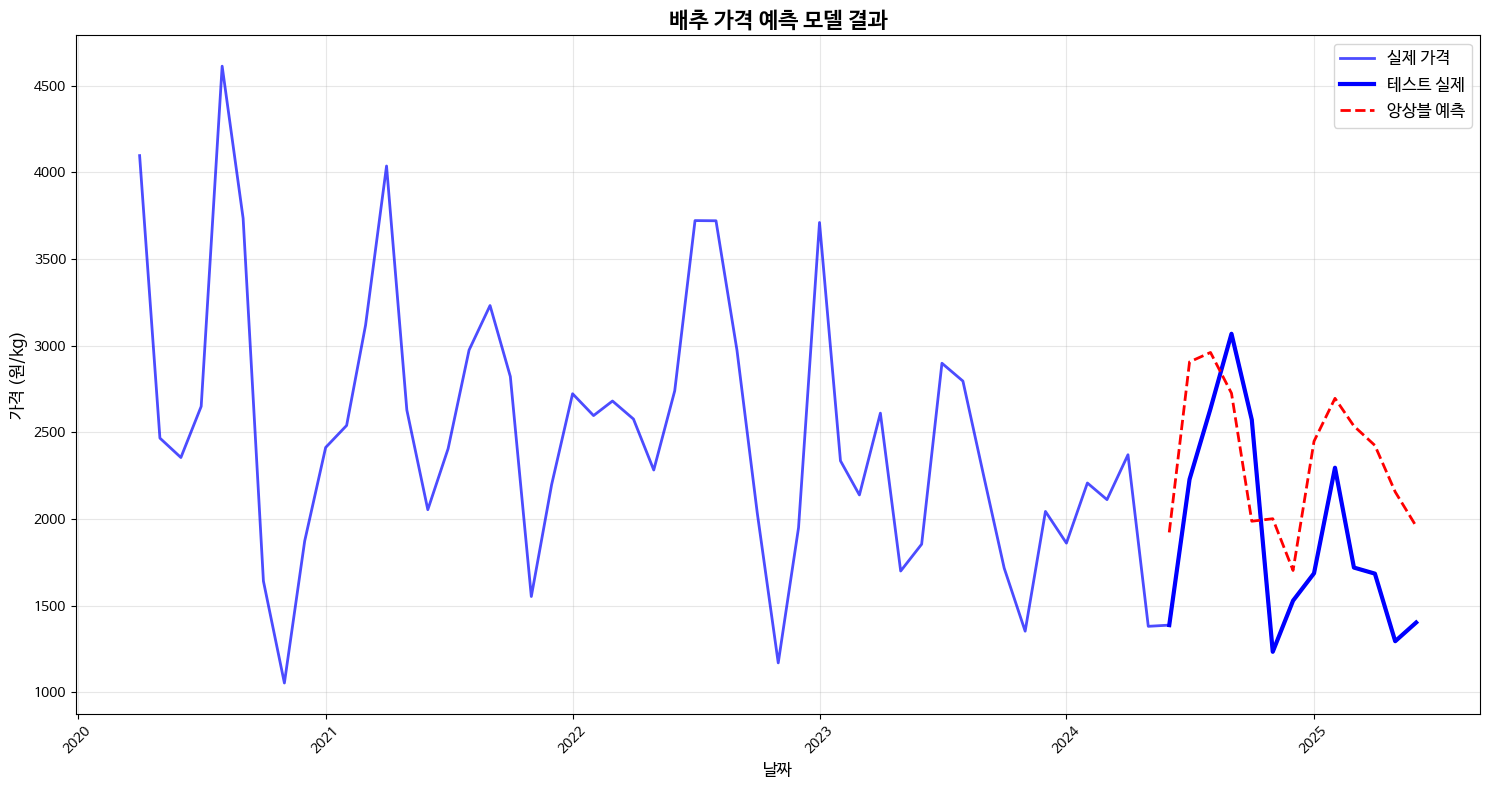

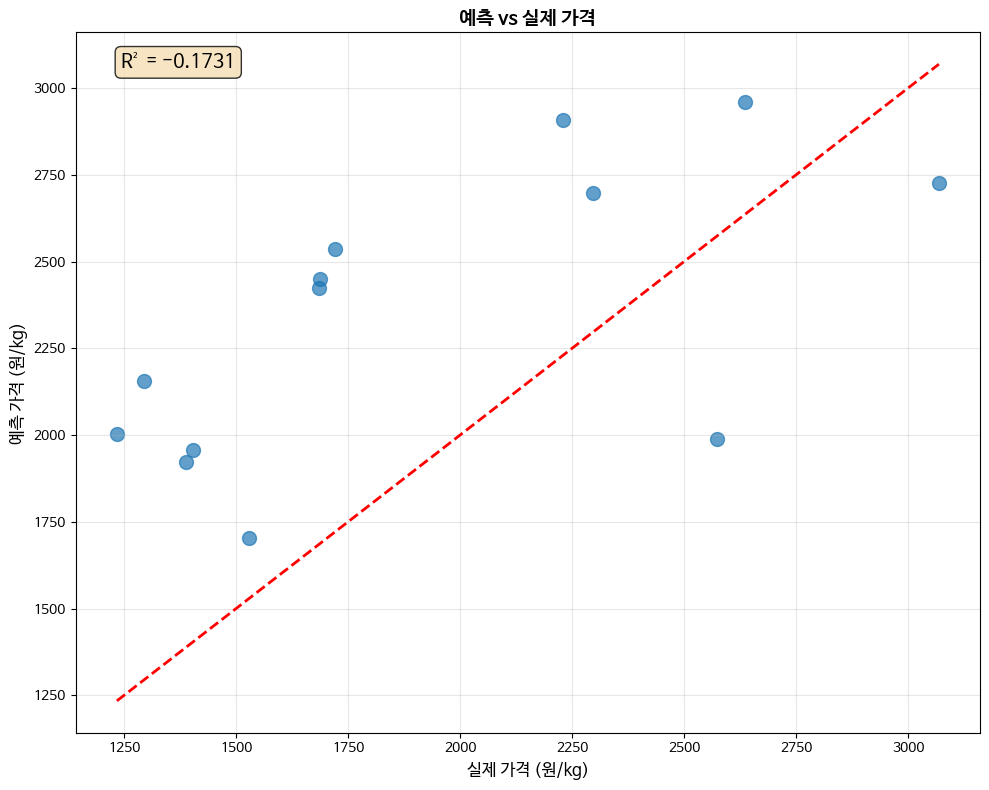

‚úÖ ÏòàÏ∏° Í≤∞Í≥º ÏãúÍ∞ÅÌôî ÏôÑÎ£å


In [23]:
def visualize_predictions(model_results, clean_df):
    """
    ÏòàÏ∏° Í≤∞Í≥º ÏãúÍ∞ÅÌôî
    """
    test_indices = model_results['test_indices']
    test_dates = clean_df.iloc[test_indices]['date_x']
    y_test = model_results['y_test']
    ensemble_pred = model_results['ensemble_pred']

    # 1. Ï†ÑÏ≤¥ Í∞ÄÍ≤© Ï∂îÏù¥ + ÏòàÏ∏° Í≤∞Í≥º
    plt.figure(figsize=(15, 8))

    # Ï†ÑÏ≤¥ Ïã§Ï†ú Í∞ÄÍ≤©
    plt.plot(clean_df['date_x'], clean_df['mean_price'],
             label='Ïã§Ï†ú Í∞ÄÍ≤©', color='blue', linewidth=2, alpha=0.7)

    # ÌÖåÏä§Ìä∏ Í∏∞Í∞Ñ Ïã§Ï†ú Í∞ÄÍ≤©
    plt.plot(test_dates, y_test,
             label='ÌÖåÏä§Ìä∏ Ïã§Ï†ú', color='blue', linewidth=3)

    # ÏòàÏ∏° Í∞ÄÍ≤©
    plt.plot(test_dates, ensemble_pred,
             label='ÏïôÏÉÅÎ∏î ÏòàÏ∏°', color='red', linewidth=2, linestyle='--')

    plt.title('Î∞∞Ï∂î Í∞ÄÍ≤© ÏòàÏ∏° Î™®Îç∏ Í≤∞Í≥º', fontsize=16, fontweight='bold')
    plt.xlabel('ÎÇ†Ïßú', fontsize=12)
    plt.ylabel('Í∞ÄÍ≤© (Ïõê/kg)', fontsize=12)
    plt.legend(fontsize=12)
    plt.grid(True, alpha=0.3)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

    # 2. ÏòàÏ∏° vs Ïã§Ï†ú ÏÇ∞Ï†êÎèÑ
    plt.figure(figsize=(10, 8))
    plt.scatter(y_test, ensemble_pred, alpha=0.7, s=100)

    # ÏôÑÎ≤ΩÌïú ÏòàÏ∏°ÏÑ† (y=x)
    min_val = min(y_test.min(), ensemble_pred.min())
    max_val = max(y_test.max(), ensemble_pred.max())
    plt.plot([min_val, max_val], [min_val, max_val], 'r--', linewidth=2)

    plt.xlabel('Ïã§Ï†ú Í∞ÄÍ≤© (Ïõê/kg)', fontsize=12)
    plt.ylabel('ÏòàÏ∏° Í∞ÄÍ≤© (Ïõê/kg)', fontsize=12)
    plt.title('ÏòàÏ∏° vs Ïã§Ï†ú Í∞ÄÍ≤©', fontsize=14, fontweight='bold')
    plt.grid(True, alpha=0.3)

    # R¬≤ ÌëúÏãú
    r2 = r2_score(y_test, ensemble_pred)
    plt.text(0.05, 0.95, f'R¬≤ = {r2:.4f}', transform=plt.gca().transAxes,
             fontsize=14, bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.8))

    plt.tight_layout()
    plt.show()

    print("‚úÖ ÏòàÏ∏° Í≤∞Í≥º ÏãúÍ∞ÅÌôî ÏôÑÎ£å")

# ÏãúÍ∞ÅÌôî Ïã§Ìñâ
if 'model_results' in locals() and 'clean_df' in locals():
    visualize_predictions(model_results, clean_df)

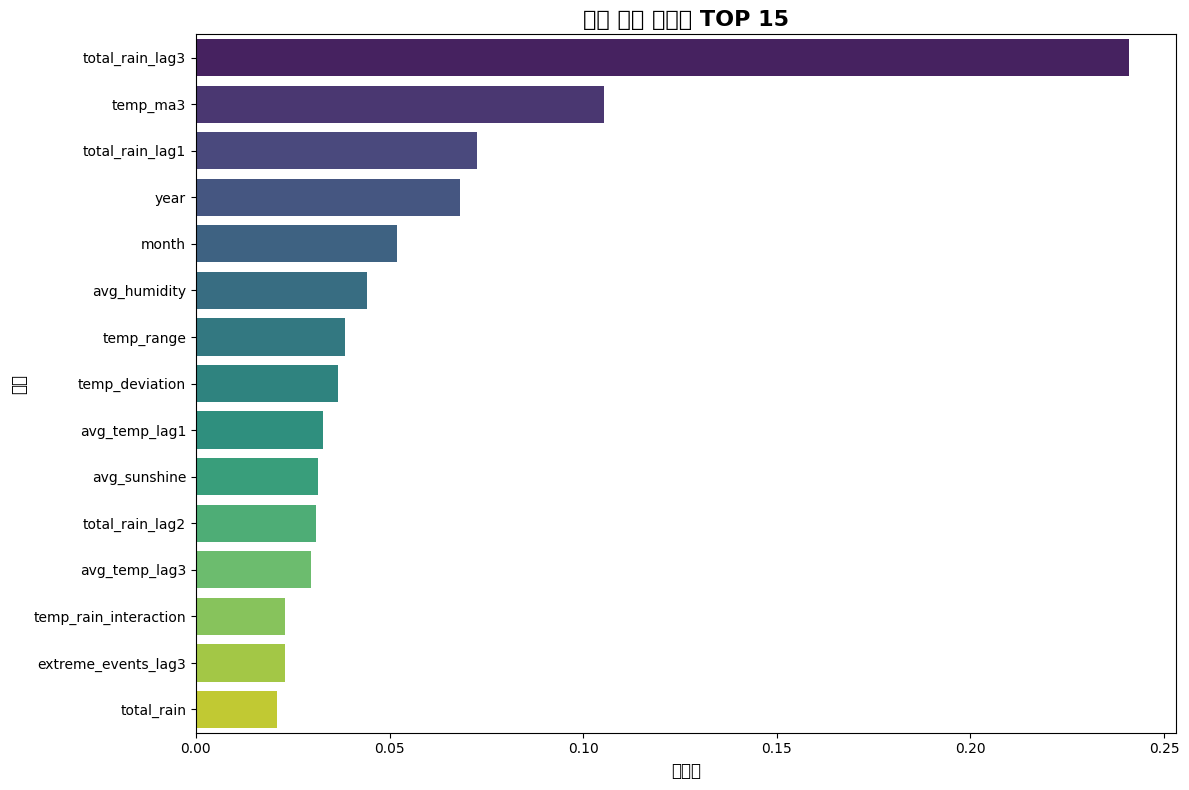

üîç Ï£ºÏöî ÌäπÏÑ± Ï§ëÏöîÎèÑ TOP 10:
   23. total_rain_lag3          : 0.2411
   29. temp_ma3                 : 0.1053
   17. total_rain_lag1          : 0.0725
    1. year                     : 0.0683
    2. month                    : 0.0519
    7. avg_humidity             : 0.0441
   14. temp_range               : 0.0385
   35. temp_deviation           : 0.0368
   15. avg_temp_lag1            : 0.0328
    8. avg_sunshine             : 0.0314


In [33]:
def analyze_feature_importance(model_results, feature_names):
    """
    ÌäπÏÑ± Ï§ëÏöîÎèÑ Î∂ÑÏÑù Î∞è ÏãúÍ∞ÅÌôî
    """
    rf_model = model_results['models']['RandomForest']['model']
    gb_model = model_results['models']['GradientBoosting']['model']

    # ÌäπÏÑ± Ï§ëÏöîÎèÑ Îç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏûÑ ÏÉùÏÑ±
    importance_df = pd.DataFrame({
        'feature': feature_names,
        'rf_importance': rf_model.feature_importances_,
        'gb_importance': gb_model.feature_importances_
    })

    # ÌèâÍ∑† Ï§ëÏöîÎèÑ Í≥ÑÏÇ∞
    importance_df['avg_importance'] = (importance_df['rf_importance'] +
                                     importance_df['gb_importance']) / 2

    # Ï§ëÏöîÎèÑ ÏàúÏúºÎ°ú Ï†ïÎ†¨
    importance_df = importance_df.sort_values('avg_importance', ascending=False)

    # ÏÉÅÏúÑ 15Í∞ú ÌäπÏÑ± ÏãúÍ∞ÅÌôî
    plt.figure(figsize=(12, 8))
    top_features = importance_df.head(15)

    sns.barplot(data=top_features, y='feature', x='avg_importance', palette='viridis')
    plt.title('Ï£ºÏöî ÌäπÏÑ± Ï§ëÏöîÎèÑ TOP 15', fontsize=16, fontweight='bold')
    plt.xlabel('Ï§ëÏöîÎèÑ', fontsize=12)
    plt.ylabel('ÌäπÏÑ±', fontsize=12)
    plt.tight_layout()
    plt.show()

    print("üîç Ï£ºÏöî ÌäπÏÑ± Ï§ëÏöîÎèÑ TOP 10:")
    for i, row in top_features.head(10).iterrows():
        print(f"   {row.name+1:2d}. {row['feature']:<25}: {row['avg_importance']:.4f}")

    return importance_df

# ÌäπÏÑ± Ï§ëÏöîÎèÑ Î∂ÑÏÑù
if 'model_results' in locals() and 'feature_names' in locals():
    importance_df = analyze_feature_importance(model_results, feature_names)

In [34]:
def predict_future_prices(models, scaler, feature_names, weather_scenarios):
    """
    Í∏∞ÏÉÅ ÏãúÎÇòÎ¶¨Ïò§Î≥Ñ ÎØ∏Îûò Í∞ÄÍ≤© ÏòàÏ∏°

    Parameters:
    models: ÌïôÏäµÎêú Î™®Îç∏Îì§
    scaler: ÌäπÏÑ± Ïä§ÏºÄÏùºÎü¨
    feature_names: ÌäπÏÑ± Ïù¥Î¶Ñ Î¶¨Ïä§Ìä∏
    weather_scenarios: Í∏∞ÏÉÅ ÏãúÎÇòÎ¶¨Ïò§ Î¶¨Ïä§Ìä∏
    """
    predictions = []

    for scenario in weather_scenarios:
        # ÏãúÎÇòÎ¶¨Ïò§Î•º ÌäπÏÑ± Î≤°ÌÑ∞Î°ú Î≥ÄÌôò
        features = create_scenario_features(scenario, feature_names)

        # ÌäπÏÑ± Ïä§ÏºÄÏùºÎßÅ
        features_scaled = scaler.transform([features])

        # Í∞Å Î™®Îç∏Î°ú ÏòàÏ∏°
        rf_pred = models['RandomForest']['model'].predict(features_scaled)[0]
        gb_pred = models['GradientBoosting']['model'].predict(features_scaled)[0]

        # ÏïôÏÉÅÎ∏î ÏòàÏ∏°
        ensemble_pred = (rf_pred + gb_pred) / 2

        predictions.append({
            'scenario_name': scenario['name'],
            'month': scenario['month'],
            'predicted_price': round(ensemble_pred),
            'rf_prediction': round(rf_pred),
            'gb_prediction': round(gb_pred),
            'weather_description': scenario['description']
        })

    return predictions

def create_scenario_features(scenario, feature_names):
    """
    ÏãúÎÇòÎ¶¨Ïò§Î•º ÌäπÏÑ± Î≤°ÌÑ∞Î°ú Î≥ÄÌôò
    """
    # Í∏∞Î≥∏ ÌäπÏÑ±Í∞í ÏÑ§Ï†ï
    features = {name: 0 for name in feature_names}

    # Í∏∞Î≥∏ Í∏∞ÏÉÅ ÌäπÏÑ±
    features['avg_temp'] = scenario.get('avg_temp', 15)
    features['total_rain'] = scenario.get('total_rain', 100)
    features['extreme_events_total'] = scenario.get('extreme_events', 0)
    features['min_temp'] = scenario.get('min_temp', features['avg_temp'] - 5)
    features['max_temp'] = scenario.get('max_temp', features['avg_temp'] + 5)
    features['avg_humidity'] = scenario.get('humidity', 60)
    features['avg_sunshine'] = scenario.get('sunshine', 6)

    # Í∑πÌïúÍ∏∞ÏÉÅ Í∞úÎ≥Ñ Ïù¥Î≤§Ìä∏
    features['heatwave_days'] = scenario.get('heatwave_days', 0)
    features['coldwave_days'] = scenario.get('coldwave_days', 0)
    features['heavy_rain_days'] = scenario.get('heavy_rain_days', 0)
    features['drought_days'] = scenario.get('drought_days', 0)

    # ÌååÏÉù ÌäπÏÑ±
    features['temp_range'] = features['max_temp'] - features['min_temp']

    # Í≥ÑÏ†àÏÑ± ÌäπÏÑ±
    month = scenario['month']
    features['is_winter'] = 1 if month in [12, 1, 2] else 0
    features['is_spring'] = 1 if month in [3, 4, 5] else 0
    features['is_summer'] = 1 if month in [6, 7, 8] else 0
    features['is_autumn'] = 1 if month in [9, 10, 11] else 0
    features['is_kimjang'] = 1 if month == 11 else 0

    # ÏãúÏ∞® ÌäπÏÑ± (Í∏∞Î≥∏Í∞íÏúºÎ°ú ÌòÑÏû¨Í∞í ÏÇ¨Ïö©)
    for lag in [1, 2, 3]:
        if f'avg_temp_lag{lag}' in feature_names:
            features[f'avg_temp_lag{lag}'] = features['avg_temp']
        if f'extreme_events_lag{lag}' in feature_names:
            features[f'extreme_events_lag{lag}'] = features['extreme_events_total']
        if f'total_rain_lag{lag}' in feature_names:
            features[f'total_rain_lag{lag}'] = features['total_rain']

    # Ïù¥ÎèôÌèâÍ∑† ÌäπÏÑ± (ÌòÑÏû¨Í∞íÏúºÎ°ú Í∑ºÏÇ¨)
    if 'temp_ma3' in feature_names:
        features['temp_ma3'] = features['avg_temp']
    if 'extreme_ma3' in feature_names:
        features['extreme_ma3'] = features['extreme_events_total']

    # ÏÉÅÌò∏ÏûëÏö© ÌäπÏÑ±
    if 'temp_rain_interaction' in feature_names:
        features['temp_rain_interaction'] = features['avg_temp'] * features['total_rain'] / 1000
    if 'extreme_summer_interaction' in feature_names:
        features['extreme_summer_interaction'] = features['extreme_events_total'] * features['is_summer']
    if 'extreme_winter_interaction' in feature_names:
        features['extreme_winter_interaction'] = features['extreme_events_total'] * features['is_winter']

    # Í∏∞ÏÉÅ ÏúÑÌóòÎèÑ Ï†êÏàò
    if 'weather_risk_score' in feature_names:
        features['weather_risk_score'] = (
            features['extreme_events_total'] * 10 +
            (features['total_rain'] > 200) * 5 +
            (features['total_rain'] < 20) * 5 +
            (features['avg_temp'] > 30) * 3 +
            (features['avg_temp'] < -5) * 3
        )

    # Ïò®ÎèÑ Ìé∏Ï∞®
    if 'temp_deviation' in feature_names:
        seasonal_optimal = {1: 3, 2: 5, 3: 10, 4: 16, 5: 20, 6: 24,
                          7: 26, 8: 27, 9: 23, 10: 18, 11: 12, 12: 5}
        features['temp_deviation'] = abs(features['avg_temp'] - seasonal_optimal.get(month, 15))

    # ÌäπÏÑ± Ïù¥Î¶Ñ ÏàúÏÑúÎåÄÎ°ú Í∞í Î∞òÌôò
    return [features.get(name, 0) for name in feature_names]

In [25]:
def add_enhanced_features(df):
    """
    Í≥†Í∏â ÌäπÏÑ± Ï∂îÍ∞Ä - Í∏∞Ï°¥ Ìï®ÏàòÏóê Ïù¥ Î∂ÄÎ∂ÑÏùÑ Ï∂îÍ∞Ä
    """
    # 1. ÎπÑÏÑ†Ìòï Î≥ÄÌôò
    df['price_log'] = np.log1p(df['mean_price'])  # Î°úÍ∑∏ Î≥ÄÌôòÏúºÎ°ú Î∂ÑÌè¨ Ï†ïÍ∑úÌôî
    df['temp_squared'] = df['avg_temp'] ** 2      # Ïò®ÎèÑÏùò ÎπÑÏÑ†Ìòï Ìö®Í≥º
    df['rain_sqrt'] = np.sqrt(df['total_rain'])   # Í∞ïÏàòÎüâ Ï†úÍ≥±Í∑º Î≥ÄÌôò

    # 2. Í∞ÄÍ≤© Î≥ÄÌôîÏú® Î∞è Î≥ÄÎèôÏÑ±
    df['price_change'] = df['mean_price'].pct_change()  # Ï†ÑÏõî ÎåÄÎπÑ Î≥ÄÌôîÏú®
    df['price_volatility'] = df['mean_price'].rolling(6).std()  # 6Í∞úÏõî Î≥ÄÎèôÏÑ±
    df['price_momentum'] = df['mean_price'].rolling(3).apply(lambda x: (x.iloc[-1] - x.iloc[0]) / x.iloc[0])

    # 3. Í≥ÑÏ†à ÎÇ¥ ÏÉÅÎåÄ ÏúÑÏπò (Í∞ôÏùÄ Îã¨Ïùò Í≥ºÍ±∞ ÌèâÍ∑† ÎåÄÎπÑ)
    monthly_historical = df.groupby('month')['mean_price'].transform('mean')
    df['price_vs_historical'] = df['mean_price'] / monthly_historical

    # 4. Í∑πÌïúÍ∏∞ÏÉÅÏùò ÎàÑÏ†Å Ìö®Í≥º (Îçî Ï†ïÍµêÌïòÍ≤å)
    df['extreme_decay_1m'] = df['extreme_events_total'].ewm(span=1).mean()  # 1Í∞úÏõî Í∞ÄÏ§ëÌèâÍ∑†
    df['extreme_decay_3m'] = df['extreme_events_total'].ewm(span=3).mean()  # 3Í∞úÏõî Í∞ÄÏ§ëÌèâÍ∑†

    # 5. Í∏∞ÏÉÅ Ïä§Ìä∏Î†àÏä§ ÏßÄÏàò (Í≥ÑÏ†àÎ≥Ñ Ï†ÅÏ†ïÍ∞íÍ≥ºÏùò Ìé∏Ï∞®)
    seasonal_optimal = df['month'].map({
        1: {'temp': 3, 'rain': 30}, 2: {'temp': 5, 'rain': 35}, 3: {'temp': 10, 'rain': 60},
        4: {'temp': 16, 'rain': 80}, 5: {'temp': 20, 'rain': 100}, 6: {'temp': 24, 'rain': 150},
        7: {'temp': 26, 'rain': 250}, 8: {'temp': 27, 'rain': 250}, 9: {'temp': 23, 'rain': 200},
        10: {'temp': 18, 'rain': 80}, 11: {'temp': 12, 'rain': 40}, 12: {'temp': 5, 'rain': 25}
    })

    df['temp_stress_normalized'] = abs(df['avg_temp'] - seasonal_optimal.apply(lambda x: x['temp'])) / 10
    df['rain_stress_normalized'] = abs(df['total_rain'] - seasonal_optimal.apply(lambda x: x['rain'])) / 100

    # 6. Î≥µÌï© Í∏∞ÏÉÅ ÏßÄÏàò
    df['weather_comfort_index'] = (
        (df['temp_stress_normalized'] * -1) +  # Ïò®ÎèÑ Ïä§Ìä∏Î†àÏä§ Ïó≠Ïàò
        (df['rain_stress_normalized'] * -1) +  # Í∞ïÏàò Ïä§Ìä∏Î†àÏä§ Ïó≠Ïàò
        (df['extreme_events_total'] * -2)      # Í∑πÌïúÍ∏∞ÏÉÅ Ìå®ÎÑêÌã∞
    )

    # 7. ÍπÄÏû•Ï≤† ÌäπÎ≥Ñ Ï≤òÎ¶¨
    df['kimjang_effect'] = np.where(df['month'] == 11,
                                   df['mean_price'] / df['mean_price'].quantile(0.25), 0)

    # 8. Ïó∞ÎèÑÎ≥Ñ Ìä∏Î†åÎìú (ÏãúÍ∞ÑÏóê Îî∞Î•∏ Ï†ÑÎ∞òÏ†Å Î≥ÄÌôî)
    df['year_trend'] = (df['year'] - df['year'].min()) / (df['year'].max() - df['year'].min())

    print("‚úÖ Í≥†Í∏â ÌäπÏÑ± Ï∂îÍ∞Ä ÏôÑÎ£å - ÏÑ±Îä• Ìñ•ÏÉÅ ÏòàÏÉÅ")
    return df

# Í∏∞Ï°¥ final_dfÏóê Ï∂îÍ∞Ä Ï†ÅÏö©
if 'final_df' in locals():
    final_df = add_enhanced_features(final_df)

‚úÖ Í≥†Í∏â ÌäπÏÑ± Ï∂îÍ∞Ä ÏôÑÎ£å - ÏÑ±Îä• Ìñ•ÏÉÅ ÏòàÏÉÅ


In [26]:
import xgboost as xgb
from xgboost import XGBRegressor

In [37]:
def train_and_evaluate_xgboost(X, y, test_size=0.2, detailed_analysis=True):
    """
    XGBoost Î™®Îç∏ ÌïôÏäµ Î∞è ÏÉÅÏÑ∏ ÌèâÍ∞Ä
    """
    print("üî• XGBoost Î™®Îç∏ ÏÉÅÏÑ∏ Î∂ÑÏÑù ÏãúÏûë")
    print("=" * 50)

    # Îç∞Ïù¥ÌÑ∞ Î∂ÑÌï† (ÏãúÍ≥ÑÏó¥ ÏàúÏÑú Í≥†Î†§)
    split_idx = int(len(X) * (1 - test_size))
    X_train, X_test = X[:split_idx], X[split_idx:]
    y_train, y_test = y[:split_idx], y[split_idx:]

    print(f"üìä Îç∞Ïù¥ÌÑ∞ Î∂ÑÌï†:")
    print(f"   ÌõàÎ†®: {len(X_train)}Í∞úÏõî ({X.index[0]} ~ {X.index[split_idx-1]})")
    print(f"   ÌÖåÏä§Ìä∏: {len(X_test)}Í∞úÏõî ({X.index[split_idx]} ~ {X.index[-1]})")

    # XGBoost Î™®Îç∏ ÏÑ§Ï†ï (ÏµúÏ†ÅÌôîÎêú ÌïòÏù¥ÌçºÌååÎùºÎØ∏ÌÑ∞)
    xgb_model = xgb.XGBRegressor(
        n_estimators=300,
        max_depth=6,
        learning_rate=0.1,
        subsample=0.8,
        colsample_bytree=0.8,
        reg_alpha=0.1,
        reg_lambda=1.0,
        random_state=42,
        n_jobs=-1,
        early_stopping_rounds=50
    )

    # ÌïôÏäµ (Í≤ÄÏ¶ùÏÖãÏúºÎ°ú Ï°∞Í∏∞ Ï¢ÖÎ£å)
    print("\nü§ñ XGBoost Î™®Îç∏ ÌïôÏäµ Ï§ë...")
    xgb_model.fit(
        X_train, y_train,
        eval_set=[(X_train, y_train), (X_test, y_test)],
        verbose=False
    )

    # ÏòàÏ∏°
    y_train_pred = xgb_model.predict(X_train)
    y_test_pred = xgb_model.predict(X_test)

    # ÏÑ±Îä• ÏßÄÌëú Í≥ÑÏÇ∞
    metrics = {
        'train_mae': mean_absolute_error(y_train, y_train_pred),
        'test_mae': mean_absolute_error(y_test, y_test_pred),
        'train_rmse': np.sqrt(mean_squared_error(y_train, y_train_pred)),
        'test_rmse': np.sqrt(mean_squared_error(y_test, y_test_pred)),
        'train_mape': mean_absolute_percentage_error(y_train, y_train_pred) * 100,
        'test_mape': mean_absolute_percentage_error(y_test, y_test_pred) * 100,
        'train_r2': r2_score(y_train, y_train_pred),
        'test_r2': r2_score(y_test, y_test_pred)
    }

    # ÏÑ±Îä• Í≤∞Í≥º Ï∂úÎ†•
    print(f"\nüìä XGBoost ÏÑ±Îä• ÏßÄÌëú:")
    print(f"{'ÏßÄÌëú':<12} {'ÌõàÎ†®':<12} {'ÌÖåÏä§Ìä∏':<12} {'Í≥ºÏ†ÅÌï©ÎèÑ':<12}")
    print("-" * 50)
    print(f"{'MAE':<12} {metrics['train_mae']:<12.0f} {metrics['test_mae']:<12.0f} {metrics['test_mae']/metrics['train_mae']:<12.2f}")
    print(f"{'RMSE':<12} {metrics['train_rmse']:<12.0f} {metrics['test_rmse']:<12.0f} {metrics['test_rmse']/metrics['train_rmse']:<12.2f}")
    print(f"{'MAPE':<12} {metrics['train_mape']:<12.1f}% {metrics['test_mape']:<12.1f}% {metrics['test_mape']/metrics['train_mape']:<12.2f}")
    print(f"{'R¬≤':<12} {metrics['train_r2']:<12.4f} {metrics['test_r2']:<12.4f} {metrics['test_r2']/metrics['train_r2']:<12.2f}")

    # ÏÉÅÏÑ∏ Î∂ÑÏÑù
    if detailed_analysis:
        analyze_xgboost_details(xgb_model, X, y, X_train, X_test, y_train, y_test,
                               y_train_pred, y_test_pred, metrics)

    return {
        'model': xgb_model,
        'predictions': {'train': y_train_pred, 'test': y_test_pred},
        'actual': {'train': y_train, 'test': y_test},
        'metrics': metrics,
        'data_split': {'train_idx': split_idx, 'test_idx': len(X)}
    }

In [35]:
def analyze_xgboost_details(model, X, y, X_train, X_test, y_train, y_test,
                           y_train_pred, y_test_pred, metrics):
    """
    XGBoost Î™®Îç∏ ÏÉÅÏÑ∏ Î∂ÑÏÑù Î∞è ÏãúÍ∞ÅÌôî
    """
    print(f"\nüîç XGBoost ÏÉÅÏÑ∏ Î∂ÑÏÑù:")

    # 1. ÌäπÏÑ± Ï§ëÏöîÎèÑ Î∂ÑÏÑù
    feature_importance = pd.DataFrame({
        'feature': X.columns,
        'importance': model.feature_importances_
    }).sort_values('importance', ascending=False)

    print(f"\nüìä Ï£ºÏöî ÌäπÏÑ± Ï§ëÏöîÎèÑ TOP 10:")
    for i, row in feature_importance.head(10).iterrows():
        print(f"   {i+1:2d}. {row['feature']:<25}: {row['importance']:.4f}")

    # 2. ÏãúÍ∞ÅÌôî
    fig, axes = plt.subplots(2, 3, figsize=(18, 12))
    fig.suptitle('XGBoost Î™®Îç∏ ÏÉÅÏÑ∏ Î∂ÑÏÑù', fontsize=16, fontweight='bold')

    # 2-1. ÏòàÏ∏° vs Ïã§Ï†ú (ÌõàÎ†®)
    axes[0, 0].scatter(y_train, y_train_pred, alpha=0.6, color='blue', s=50)
    axes[0, 0].plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'r--', linewidth=2)
    axes[0, 0].set_xlabel('Ïã§Ï†ú Í∞ÄÍ≤© (Ïõê)')
    axes[0, 0].set_ylabel('ÏòàÏ∏° Í∞ÄÍ≤© (Ïõê)')
    axes[0, 0].set_title(f'ÌõàÎ†® ÏÑ∏Ìä∏ (R¬≤ = {metrics["train_r2"]:.4f})')
    axes[0, 0].grid(True, alpha=0.3)

    # 2-2. ÏòàÏ∏° vs Ïã§Ï†ú (ÌÖåÏä§Ìä∏)
    axes[0, 1].scatter(y_test, y_test_pred, alpha=0.6, color='red', s=50)
    axes[0, 1].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', linewidth=2)
    axes[0, 1].set_xlabel('Ïã§Ï†ú Í∞ÄÍ≤© (Ïõê)')
    axes[0, 1].set_ylabel('ÏòàÏ∏° Í∞ÄÍ≤© (Ïõê)')
    axes[0, 1].set_title(f'ÌÖåÏä§Ìä∏ ÏÑ∏Ìä∏ (R¬≤ = {metrics["test_r2"]:.4f})')
    axes[0, 1].grid(True, alpha=0.3)

    # 2-3. ÌäπÏÑ± Ï§ëÏöîÎèÑ
    top_features = feature_importance.head(15)
    axes[0, 2].barh(range(len(top_features)), top_features['importance'])
    axes[0, 2].set_yticks(range(len(top_features)))
    axes[0, 2].set_yticklabels(top_features['feature'], fontsize=10)
    axes[0, 2].set_xlabel('Ï§ëÏöîÎèÑ')
    axes[0, 2].set_title('ÌäπÏÑ± Ï§ëÏöîÎèÑ TOP 15')
    axes[0, 2].grid(True, alpha=0.3)

    # 2-4. ÏãúÍ≥ÑÏó¥ ÏòàÏ∏° Í≤∞Í≥º
    train_dates = X_train.index if hasattr(X_train, 'index') else range(len(X_train))
    test_dates = X_test.index if hasattr(X_test, 'index') else range(len(X_train), len(X_train) + len(X_test))

    axes[1, 0].plot(train_dates, y_train, label='Ïã§Ï†ú (ÌõàÎ†®)', color='blue', alpha=0.7)
    axes[1, 0].plot(train_dates, y_train_pred, label='ÏòàÏ∏° (ÌõàÎ†®)', color='lightblue', alpha=0.7)
    axes[1, 0].plot(test_dates, y_test, label='Ïã§Ï†ú (ÌÖåÏä§Ìä∏)', color='red', linewidth=2)
    axes[1, 0].plot(test_dates, y_test_pred, label='ÏòàÏ∏° (ÌÖåÏä§Ìä∏)', color='orange', linewidth=2)
    axes[1, 0].set_xlabel('ÏãúÍ∞Ñ')
    axes[1, 0].set_ylabel('Í∞ÄÍ≤© (Ïõê)')
    axes[1, 0].set_title('ÏãúÍ≥ÑÏó¥ ÏòàÏ∏° Í≤∞Í≥º')
    axes[1, 0].legend()
    axes[1, 0].grid(True, alpha=0.3)

    # 2-5. ÏûîÏ∞® Î∂ÑÏÑù
    residuals_test = y_test - y_test_pred
    axes[1, 1].scatter(y_test_pred, residuals_test, alpha=0.6, color='green')
    axes[1, 1].axhline(y=0, color='red', linestyle='--')
    axes[1, 1].set_xlabel('ÏòàÏ∏° Í∞ÄÍ≤© (Ïõê)')
    axes[1, 1].set_ylabel('ÏûîÏ∞® (Ïã§Ï†ú - ÏòàÏ∏°)')
    axes[1, 1].set_title('ÏûîÏ∞® Î∂ÑÏÑù (ÌÖåÏä§Ìä∏)')
    axes[1, 1].grid(True, alpha=0.3)

    # 2-6. Ïò§Ï∞® Î∂ÑÌè¨
    absolute_errors = np.abs(residuals_test)
    axes[1, 2].hist(absolute_errors, bins=20, alpha=0.7, color='purple', edgecolor='black')
    axes[1, 2].axvline(metrics['test_mae'], color='red', linestyle='--',
                       label=f'ÌèâÍ∑† Ïò§Ï∞®: {metrics["test_mae"]:.0f}Ïõê')
    axes[1, 2].set_xlabel('Ï†àÎåÄ Ïò§Ï∞® (Ïõê)')
    axes[1, 2].set_ylabel('ÎπàÎèÑ')
    axes[1, 2].set_title('Ï†àÎåÄ Ïò§Ï∞® Î∂ÑÌè¨')
    axes[1, 2].legend()
    axes[1, 2].grid(True, alpha=0.3)

    plt.tight_layout()
    plt.show()

    # 3. Ïò§Ï∞® ÏÉÅÏÑ∏ Î∂ÑÏÑù
    print(f"\nüìà Ïò§Ï∞® ÏÉÅÏÑ∏ Î∂ÑÏÑù:")
    print(f"   ÏµúÎåÄ Ïò§Ï∞®: {np.max(absolute_errors):.0f}Ïõê")
    print(f"   Ïò§Ï∞® ÌëúÏ§ÄÌé∏Ï∞®: {np.std(absolute_errors):.0f}Ïõê")
    print(f"   Ïò§Ï∞® 90% Î∂ÑÏúÑÏàò: {np.percentile(absolute_errors, 90):.0f}Ïõê")
    print(f"   500Ïõê Ïù¥ÎÇ¥ ÏòàÏ∏° ÎπÑÏú®: {(absolute_errors <= 500).mean()*100:.1f}%")

üî• XGBoost Î™®Îç∏ ÏÉÅÏÑ∏ Î∂ÑÏÑù ÏãúÏûë
üìä Îç∞Ïù¥ÌÑ∞ Î∂ÑÌï†:
   ÌõàÎ†®: 50Í∞úÏõî (3 ~ 52)
   ÌÖåÏä§Ìä∏: 13Í∞úÏõî (53 ~ 65)

ü§ñ XGBoost Î™®Îç∏ ÌïôÏäµ Ï§ë...

üìä XGBoost ÏÑ±Îä• ÏßÄÌëú:
ÏßÄÌëú           ÌõàÎ†®           ÌÖåÏä§Ìä∏          Í≥ºÏ†ÅÌï©ÎèÑ        
--------------------------------------------------
MAE          20           568          28.09       
RMSE         34           613          17.87       
MAPE         0.9         % 33.7        % 39.15       
R¬≤           0.9980       -0.1614      -0.16       

üîç XGBoost ÏÉÅÏÑ∏ Î∂ÑÏÑù:

üìä Ï£ºÏöî ÌäπÏÑ± Ï§ëÏöîÎèÑ TOP 10:
   23. total_rain_lag3          : 0.1419
   19. extreme_events_lag2      : 0.1252
   28. is_kimjang               : 0.0797
   15. avg_temp_lag1            : 0.0688
   13. extreme_events_total     : 0.0670
   29. temp_ma3                 : 0.0562
   17. total_rain_lag1          : 0.0477
   11. heavy_rain_days          : 0.0361
   10. coldwave_days            : 0.0350
   12. drought_days             : 0.03

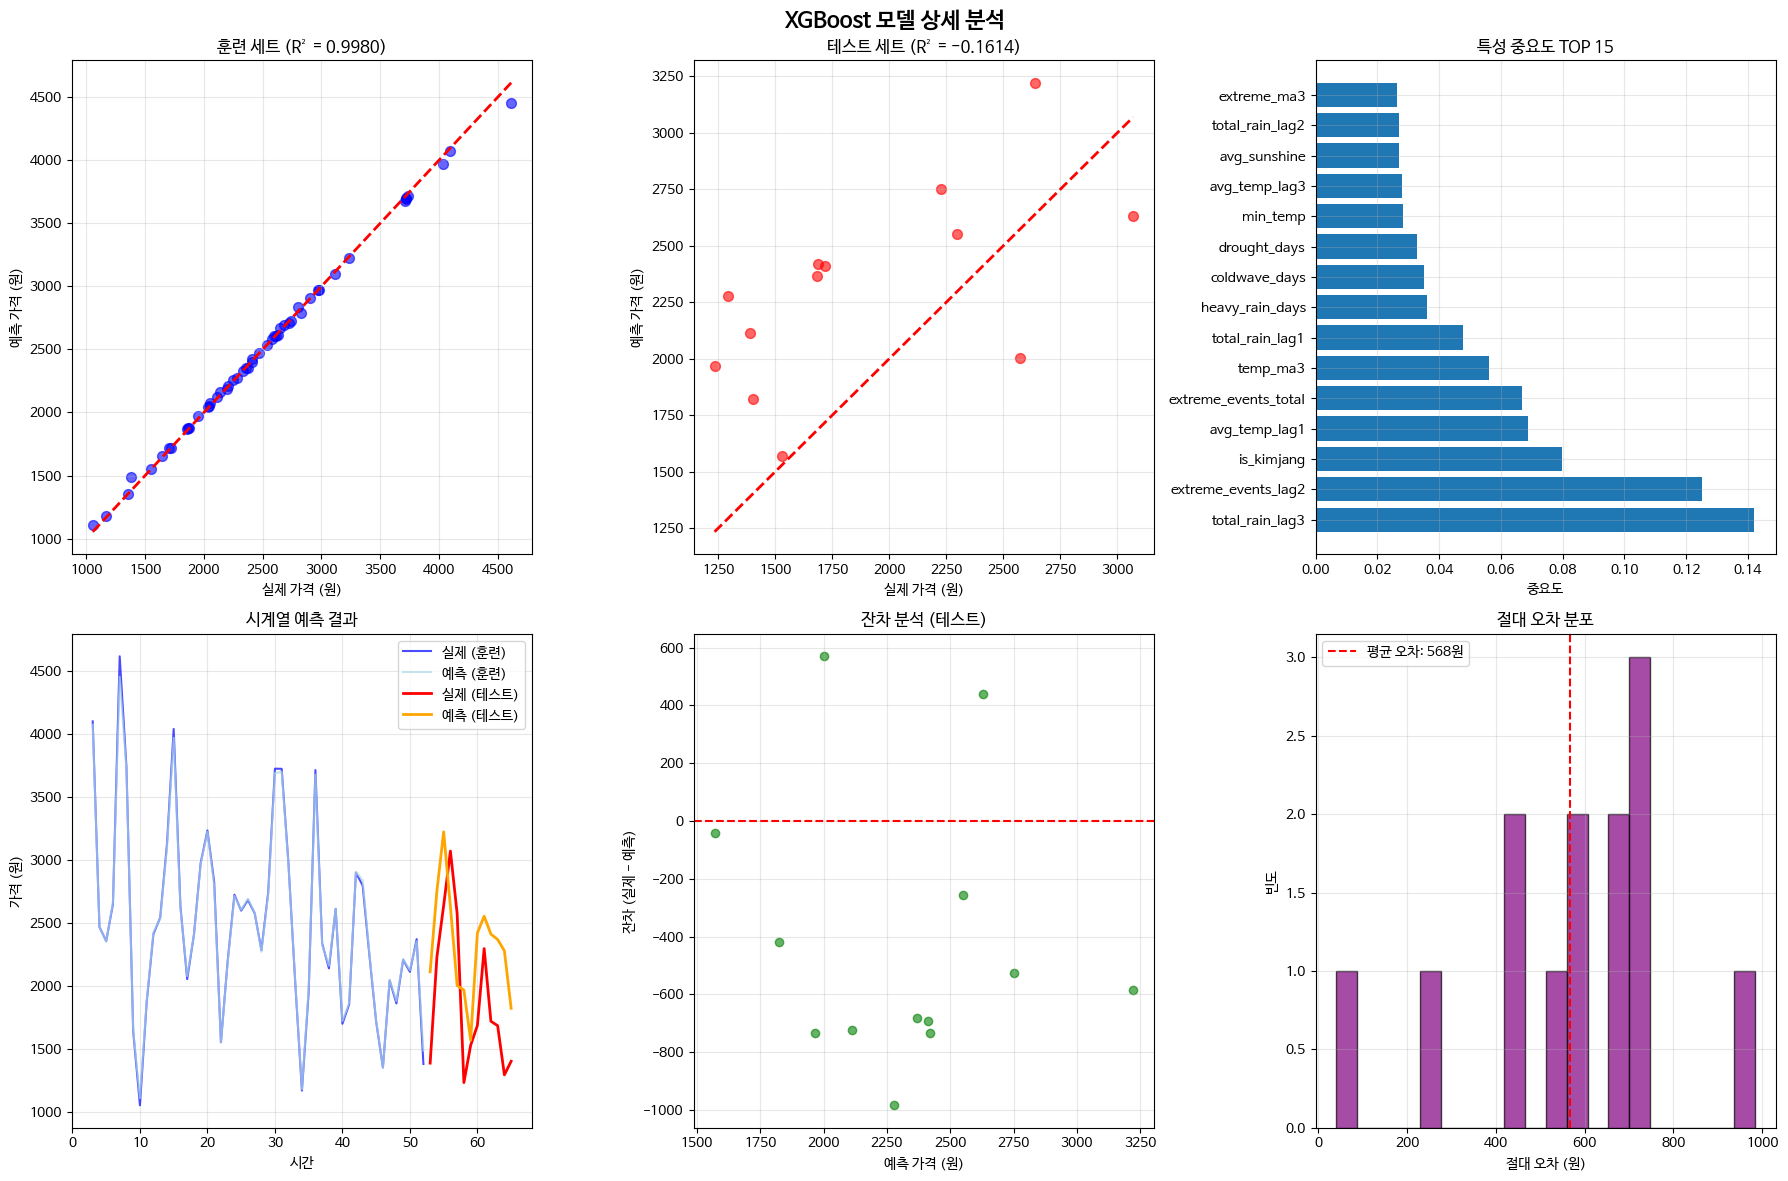


üìà Ïò§Ï∞® ÏÉÅÏÑ∏ Î∂ÑÏÑù:
   ÏµúÎåÄ Ïò§Ï∞®: 983Ïõê
   Ïò§Ï∞® ÌëúÏ§ÄÌé∏Ï∞®: 231Ïõê
   Ïò§Ï∞® 90% Î∂ÑÏúÑÏàò: 733Ïõê
   500Ïõê Ïù¥ÎÇ¥ ÏòàÏ∏° ÎπÑÏú®: 30.8%


In [38]:
xgb_results = train_and_evaluate_xgboost(X, y, test_size=0.2, detailed_analysis=True)

In [29]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

In [39]:
def train_and_evaluate_lstm(X, y, sequence_length=6, test_size=0.2, detailed_analysis=True):
    """
    LSTM Î™®Îç∏ ÌïôÏäµ Î∞è ÏÉÅÏÑ∏ ÌèâÍ∞Ä
    """
    print("\nüß† LSTM Î™®Îç∏ ÏÉÅÏÑ∏ Î∂ÑÏÑù ÏãúÏûë")
    print("=" * 50)

    # ÏãúÍ≥ÑÏó¥ Î∂ÑÌï† (LSTMÏö©)
    split_idx = int(len(X) * (1 - test_size))
    X_train, X_test = X[:split_idx], X[split_idx:]
    y_train, y_test = y[:split_idx], y[split_idx:]

    print(f"üìä Îç∞Ïù¥ÌÑ∞ Î∂ÑÌï† (LSTM):")
    print(f"   ÌõàÎ†®: {len(X_train)}Í∞úÏõî")
    print(f"   ÌÖåÏä§Ìä∏: {len(X_test)}Í∞úÏõî")
    print(f"   ÏãúÌÄÄÏä§ Í∏∏Ïù¥: {sequence_length}Í∞úÏõî")

    # Ïä§ÏºÄÏùºÎßÅ
    from sklearn.preprocessing import StandardScaler
    scaler_X = StandardScaler()
    scaler_y = StandardScaler()

    X_train_scaled = scaler_X.fit_transform(X_train)
    X_test_scaled = scaler_X.transform(X_test)
    y_train_scaled = scaler_y.fit_transform(y_train.values.reshape(-1, 1)).flatten()
    y_test_scaled = scaler_y.transform(y_test.values.reshape(-1, 1)).flatten()

    # ÏãúÌÄÄÏä§ Îç∞Ïù¥ÌÑ∞ ÏÉùÏÑ±
    def create_sequences(X, y, seq_len):
        X_seq, y_seq = [], []
        for i in range(seq_len, len(X)):
            X_seq.append(X[i-seq_len:i])
            y_seq.append(y[i])
        return np.array(X_seq), np.array(y_seq)

    X_train_seq, y_train_seq = create_sequences(X_train_scaled, y_train_scaled, sequence_length)
    X_test_seq, y_test_seq = create_sequences(X_test_scaled, y_test_scaled, sequence_length)

    print(f"   ÏãúÌÄÄÏä§ ÏÉùÏÑ± ÏôÑÎ£å:")
    print(f"   ÌõàÎ†® ÏãúÌÄÄÏä§: {X_train_seq.shape}")
    print(f"   ÌÖåÏä§Ìä∏ ÏãúÌÄÄÏä§: {X_test_seq.shape}")

    # LSTM Î™®Îç∏ Íµ¨Ï∂ï
    print(f"\nüèóÔ∏è LSTM Î™®Îç∏ Íµ¨Ï∂ï:")
    model = Sequential([
        LSTM(64, return_sequences=True, input_shape=(sequence_length, X_train_seq.shape[2])),
        Dropout(0.2),
        BatchNormalization(),

        LSTM(32, return_sequences=False),
        Dropout(0.2),
        BatchNormalization(),

        Dense(16, activation='relu'),
        Dropout(0.1),
        Dense(1)
    ])

    model.compile(
        optimizer=Adam(learning_rate=0.001),
        loss='mse',
        metrics=['mae']
    )

    print(f"   LSTM Î†àÏù¥Ïñ¥: 64 ‚Üí 32 units")
    print(f"   Ï†ïÍ∑úÌôî: Dropout + BatchNormalization")
    print(f"   ÏòµÌã∞ÎßàÏù¥Ï†Ä: Adam (lr=0.001)")

    # ÏΩúÎ∞± ÏÑ§Ï†ï
    callbacks = [
        EarlyStopping(patience=20, restore_best_weights=True, monitor='val_loss'),
        ReduceLROnPlateau(factor=0.5, patience=10, min_lr=1e-6, monitor='val_loss')
    ]

    # Î™®Îç∏ ÌïôÏäµ
    print(f"\nü§ñ LSTM Î™®Îç∏ ÌïôÏäµ Ï§ë...")
    history = model.fit(
        X_train_seq, y_train_seq,
        validation_data=(X_test_seq, y_test_seq),
        epochs=100,
        batch_size=16,
        callbacks=callbacks,
        verbose=1
    )

    # ÏòàÏ∏°
    y_train_pred_scaled = model.predict(X_train_seq, verbose=0)
    y_test_pred_scaled = model.predict(X_test_seq, verbose=0)

    # Ïä§ÏºÄÏùºÎßÅ Ïó≠Î≥ÄÌôò
    y_train_pred = scaler_y.inverse_transform(y_train_pred_scaled).flatten()
    y_test_pred = scaler_y.inverse_transform(y_test_pred_scaled).flatten()
    y_train_actual = scaler_y.inverse_transform(y_train_seq.reshape(-1, 1)).flatten()
    y_test_actual = scaler_y.inverse_transform(y_test_seq.reshape(-1, 1)).flatten()

    # ÏÑ±Îä• ÏßÄÌëú Í≥ÑÏÇ∞
    metrics = {
        'train_mae': mean_absolute_error(y_train_actual, y_train_pred),
        'test_mae': mean_absolute_error(y_test_actual, y_test_pred),
        'train_rmse': np.sqrt(mean_squared_error(y_train_actual, y_train_pred)),
        'test_rmse': np.sqrt(mean_squared_error(y_test_actual, y_test_pred)),
        'train_mape': mean_absolute_percentage_error(y_train_actual, y_train_pred) * 100,
        'test_mape': mean_absolute_percentage_error(y_test_actual, y_test_pred) * 100,
        'train_r2': r2_score(y_train_actual, y_train_pred),
        'test_r2': r2_score(y_test_actual, y_test_pred)
    }

    # ÏÑ±Îä• Í≤∞Í≥º Ï∂úÎ†•
    print(f"\nüìä LSTM ÏÑ±Îä• ÏßÄÌëú:")
    print(f"{'ÏßÄÌëú':<12} {'ÌõàÎ†®':<12} {'ÌÖåÏä§Ìä∏':<12} {'Í≥ºÏ†ÅÌï©ÎèÑ':<12}")
    print("-" * 50)
    print(f"{'MAE':<12} {metrics['train_mae']:<12.0f} {metrics['test_mae']:<12.0f} {metrics['test_mae']/metrics['train_mae']:<12.2f}")
    print(f"{'RMSE':<12} {metrics['train_rmse']:<12.0f} {metrics['test_rmse']:<12.0f} {metrics['test_rmse']/metrics['train_rmse']:<12.2f}")
    print(f"{'MAPE':<12} {metrics['train_mape']:<12.1f}% {metrics['test_mape']:<12.1f}% {metrics['test_mape']/metrics['train_mape']:<12.2f}")
    print(f"{'R¬≤':<12} {metrics['train_r2']:<12.4f} {metrics['test_r2']:<12.4f} {metrics['test_r2']/metrics['train_r2']:<12.2f}")

    # ÏÉÅÏÑ∏ Î∂ÑÏÑù
    if detailed_analysis:
        analyze_lstm_details(model, history, X_train_seq, X_test_seq,
                           y_train_actual, y_test_actual, y_train_pred, y_test_pred,
                           metrics, sequence_length)

    return {
        'model': model,
        'scaler_X': scaler_X,
        'scaler_y': scaler_y,
        'predictions': {'train': y_train_pred, 'test': y_test_pred},
        'actual': {'train': y_train_actual, 'test': y_test_actual},
        'metrics': metrics,
        'history': history,
        'sequence_length': sequence_length
    }

In [40]:
def analyze_lstm_details(model, history, X_train_seq, X_test_seq,
                        y_train_actual, y_test_actual, y_train_pred, y_test_pred,
                        metrics, sequence_length):
    """
    LSTM Î™®Îç∏ ÏÉÅÏÑ∏ Î∂ÑÏÑù Î∞è ÏãúÍ∞ÅÌôî
    """
    print(f"\nüîç LSTM ÏÉÅÏÑ∏ Î∂ÑÏÑù:")

    # 1. ÌïôÏäµ Í≥ºÏ†ï Î∂ÑÏÑù
    print(f"\nüìà ÌïôÏäµ Í≥ºÏ†ï:")
    print(f"   Ï¥ù ÏóêÌè¨ÌÅ¨: {len(history.history['loss'])}")
    print(f"   ÏµúÏ¢Ö ÌõàÎ†® ÏÜêÏã§: {history.history['loss'][-1]:.4f}")
    print(f"   ÏµúÏ¢Ö Í≤ÄÏ¶ù ÏÜêÏã§: {history.history['val_loss'][-1]:.4f}")
    print(f"   ÏµúÍ≥† Í≤ÄÏ¶ù ÏÑ±Îä• ÏóêÌè¨ÌÅ¨: {np.argmin(history.history['val_loss']) + 1}")

    # 2. ÏãúÍ∞ÅÌôî
    fig, axes = plt.subplots(2, 3, figsize=(18, 12))
    fig.suptitle('LSTM Î™®Îç∏ ÏÉÅÏÑ∏ Î∂ÑÏÑù', fontsize=16, fontweight='bold')

    # 2-1. ÌïôÏäµ Í≥°ÏÑ† (Loss)
    axes[0, 0].plot(history.history['loss'], label='ÌõàÎ†® ÏÜêÏã§', color='blue')
    axes[0, 0].plot(history.history['val_loss'], label='Í≤ÄÏ¶ù ÏÜêÏã§', color='red')
    axes[0, 0].set_xlabel('ÏóêÌè¨ÌÅ¨')
    axes[0, 0].set_ylabel('ÏÜêÏã§ (MSE)')
    axes[0, 0].set_title('ÌïôÏäµ Í≥°ÏÑ† - ÏÜêÏã§')
    axes[0, 0].legend()
    axes[0, 0].grid(True, alpha=0.3)

    # 2-2. ÌïôÏäµ Í≥°ÏÑ† (MAE)
    axes[0, 1].plot(history.history['mae'], label='ÌõàÎ†® MAE', color='blue')
    axes[0, 1].plot(history.history['val_mae'], label='Í≤ÄÏ¶ù MAE', color='red')
    axes[0, 1].set_xlabel('ÏóêÌè¨ÌÅ¨')
    axes[0, 1].set_ylabel('MAE')
    axes[0, 1].set_title('ÌïôÏäµ Í≥°ÏÑ† - MAE')
    axes[0, 1].legend()
    axes[0, 1].grid(True, alpha=0.3)

    # 2-3. ÏòàÏ∏° vs Ïã§Ï†ú (ÌÖåÏä§Ìä∏)
    axes[0, 2].scatter(y_test_actual, y_test_pred, alpha=0.6, color='red', s=50)
    axes[0, 2].plot([y_test_actual.min(), y_test_actual.max()],
                    [y_test_actual.min(), y_test_actual.max()], 'r--', linewidth=2)
    axes[0, 2].set_xlabel('Ïã§Ï†ú Í∞ÄÍ≤© (Ïõê)')
    axes[0, 2].set_ylabel('ÏòàÏ∏° Í∞ÄÍ≤© (Ïõê)')
    axes[0, 2].set_title(f'ÏòàÏ∏° vs Ïã§Ï†ú (R¬≤ = {metrics["test_r2"]:.4f})')
    axes[0, 2].grid(True, alpha=0.3)

    # 2-4. ÏãúÍ≥ÑÏó¥ ÏòàÏ∏° Í≤∞Í≥º
    train_range = range(len(y_train_actual))
    test_range = range(len(y_train_actual), len(y_train_actual) + len(y_test_actual))

    axes[1, 0].plot(train_range, y_train_actual, label='Ïã§Ï†ú (ÌõàÎ†®)', color='blue', alpha=0.7)
    axes[1, 0].plot(train_range, y_train_pred, label='ÏòàÏ∏° (ÌõàÎ†®)', color='lightblue', alpha=0.7)
    axes[1, 0].plot(test_range, y_test_actual, label='Ïã§Ï†ú (ÌÖåÏä§Ìä∏)', color='red', linewidth=2)
    axes[1, 0].plot(test_range, y_test_pred, label='ÏòàÏ∏° (ÌÖåÏä§Ìä∏)', color='orange', linewidth=2)
    axes[1, 0].set_xlabel('ÏãúÍ∞Ñ (ÏãúÌÄÄÏä§ Ï°∞Ï†ïÎê®)')
    axes[1, 0].set_ylabel('Í∞ÄÍ≤© (Ïõê)')
    axes[1, 0].set_title(f'LSTM ÏãúÍ≥ÑÏó¥ ÏòàÏ∏° (ÏãúÌÄÄÏä§: {sequence_length}Í∞úÏõî)')
    axes[1, 0].legend()
    axes[1, 0].grid(True, alpha=0.3)

    # 2-5. ÏûîÏ∞® Î∂ÑÏÑù
    residuals_test = y_test_actual - y_test_pred
    axes[1, 1].scatter(y_test_pred, residuals_test, alpha=0.6, color='green')
    axes[1, 1].axhline(y=0, color='red', linestyle='--')
    axes[1, 1].set_xlabel('ÏòàÏ∏° Í∞ÄÍ≤© (Ïõê)')
    axes[1, 1].set_ylabel('ÏûîÏ∞® (Ïã§Ï†ú - ÏòàÏ∏°)')
    axes[1, 1].set_title('LSTM ÏûîÏ∞® Î∂ÑÏÑù')
    axes[1, 1].grid(True, alpha=0.3)

    # 2-6. Ïò§Ï∞® Î∂ÑÌè¨
    absolute_errors = np.abs(residuals_test)
    axes[1, 2].hist(absolute_errors, bins=15, alpha=0.7, color='purple', edgecolor='black')
    axes[1, 2].axvline(metrics['test_mae'], color='red', linestyle='--',
                       label=f'ÌèâÍ∑† Ïò§Ï∞®: {metrics["test_mae"]:.0f}Ïõê')
    axes[1, 2].set_xlabel('Ï†àÎåÄ Ïò§Ï∞® (Ïõê)')
    axes[1, 2].set_ylabel('ÎπàÎèÑ')
    axes[1, 2].set_title('LSTM Ï†àÎåÄ Ïò§Ï∞® Î∂ÑÌè¨')
    axes[1, 2].legend()
    axes[1, 2].grid(True, alpha=0.3)

    plt.tight_layout()
    plt.show()

    # 3. ÏãúÍ≥ÑÏó¥ ÌäπÏÑ± Î∂ÑÏÑù
    print(f"\nüïê ÏãúÍ≥ÑÏó¥ ÌäπÏÑ± Î∂ÑÏÑù:")
    print(f"   ÏµúÎåÄ Ïò§Ï∞®: {np.max(absolute_errors):.0f}Ïõê")
    print(f"   Ïò§Ï∞® ÌëúÏ§ÄÌé∏Ï∞®: {np.std(absolute_errors):.0f}Ïõê")
    print(f"   Ïò§Ï∞® 90% Î∂ÑÏúÑÏàò: {np.percentile(absolute_errors, 90):.0f}Ïõê")
    print(f"   500Ïõê Ïù¥ÎÇ¥ ÏòàÏ∏° ÎπÑÏú®: {(absolute_errors <= 500).mean()*100:.1f}%")

    # 4. ÏãúÌÄÄÏä§ Í∏∏Ïù¥ Ìö®Í≥º Î∂ÑÏÑù
    recent_errors = absolute_errors[-6:]  # ÏµúÍ∑º 6Í∞úÏõî Ïò§Ï∞®
    early_errors = absolute_errors[:6]    # Ï¥àÍ∏∞ 6Í∞úÏõî Ïò§Ï∞®
    print(f"   Ï¥àÍ∏∞ 6Í∞úÏõî ÌèâÍ∑† Ïò§Ï∞®: {np.mean(early_errors):.0f}Ïõê")
    print(f"   ÏµúÍ∑º 6Í∞úÏõî ÌèâÍ∑† Ïò§Ï∞®: {np.mean(recent_errors):.0f}Ïõê")


üß† LSTM Î™®Îç∏ ÏÉÅÏÑ∏ Î∂ÑÏÑù ÏãúÏûë
üìä Îç∞Ïù¥ÌÑ∞ Î∂ÑÌï† (LSTM):
   ÌõàÎ†®: 50Í∞úÏõî
   ÌÖåÏä§Ìä∏: 13Í∞úÏõî
   ÏãúÌÄÄÏä§ Í∏∏Ïù¥: 6Í∞úÏõî
   ÏãúÌÄÄÏä§ ÏÉùÏÑ± ÏôÑÎ£å:
   ÌõàÎ†® ÏãúÌÄÄÏä§: (44, 6, 35)
   ÌÖåÏä§Ìä∏ ÏãúÌÄÄÏä§: (7, 6, 35)

üèóÔ∏è LSTM Î™®Îç∏ Íµ¨Ï∂ï:
   LSTM Î†àÏù¥Ïñ¥: 64 ‚Üí 32 units
   Ï†ïÍ∑úÌôî: Dropout + BatchNormalization
   ÏòµÌã∞ÎßàÏù¥Ï†Ä: Adam (lr=0.001)

ü§ñ LSTM Î™®Îç∏ ÌïôÏäµ Ï§ë...
Epoch 1/100
3/3 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 7s 279ms/step - loss: 1.0798 - mae: 0.8101 - val_loss: 1.1493 - val_mae: 0.9965 - learning_rate: 0.0010
Epoch 2/100
3/3 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 37ms/step - loss: 0.9260 - mae: 0.7985 - val_loss: 1.1376 - val_mae: 0.9911 - learning_rate: 0.0010
Epoch 3/100
3/3 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 34ms/step - loss: 0.7392 - mae: 0.6639 - val_loss: 1.1434 - val_mae: 0.9971 - learning_rate: 0.0010
Epoch 4/100
3/3 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚

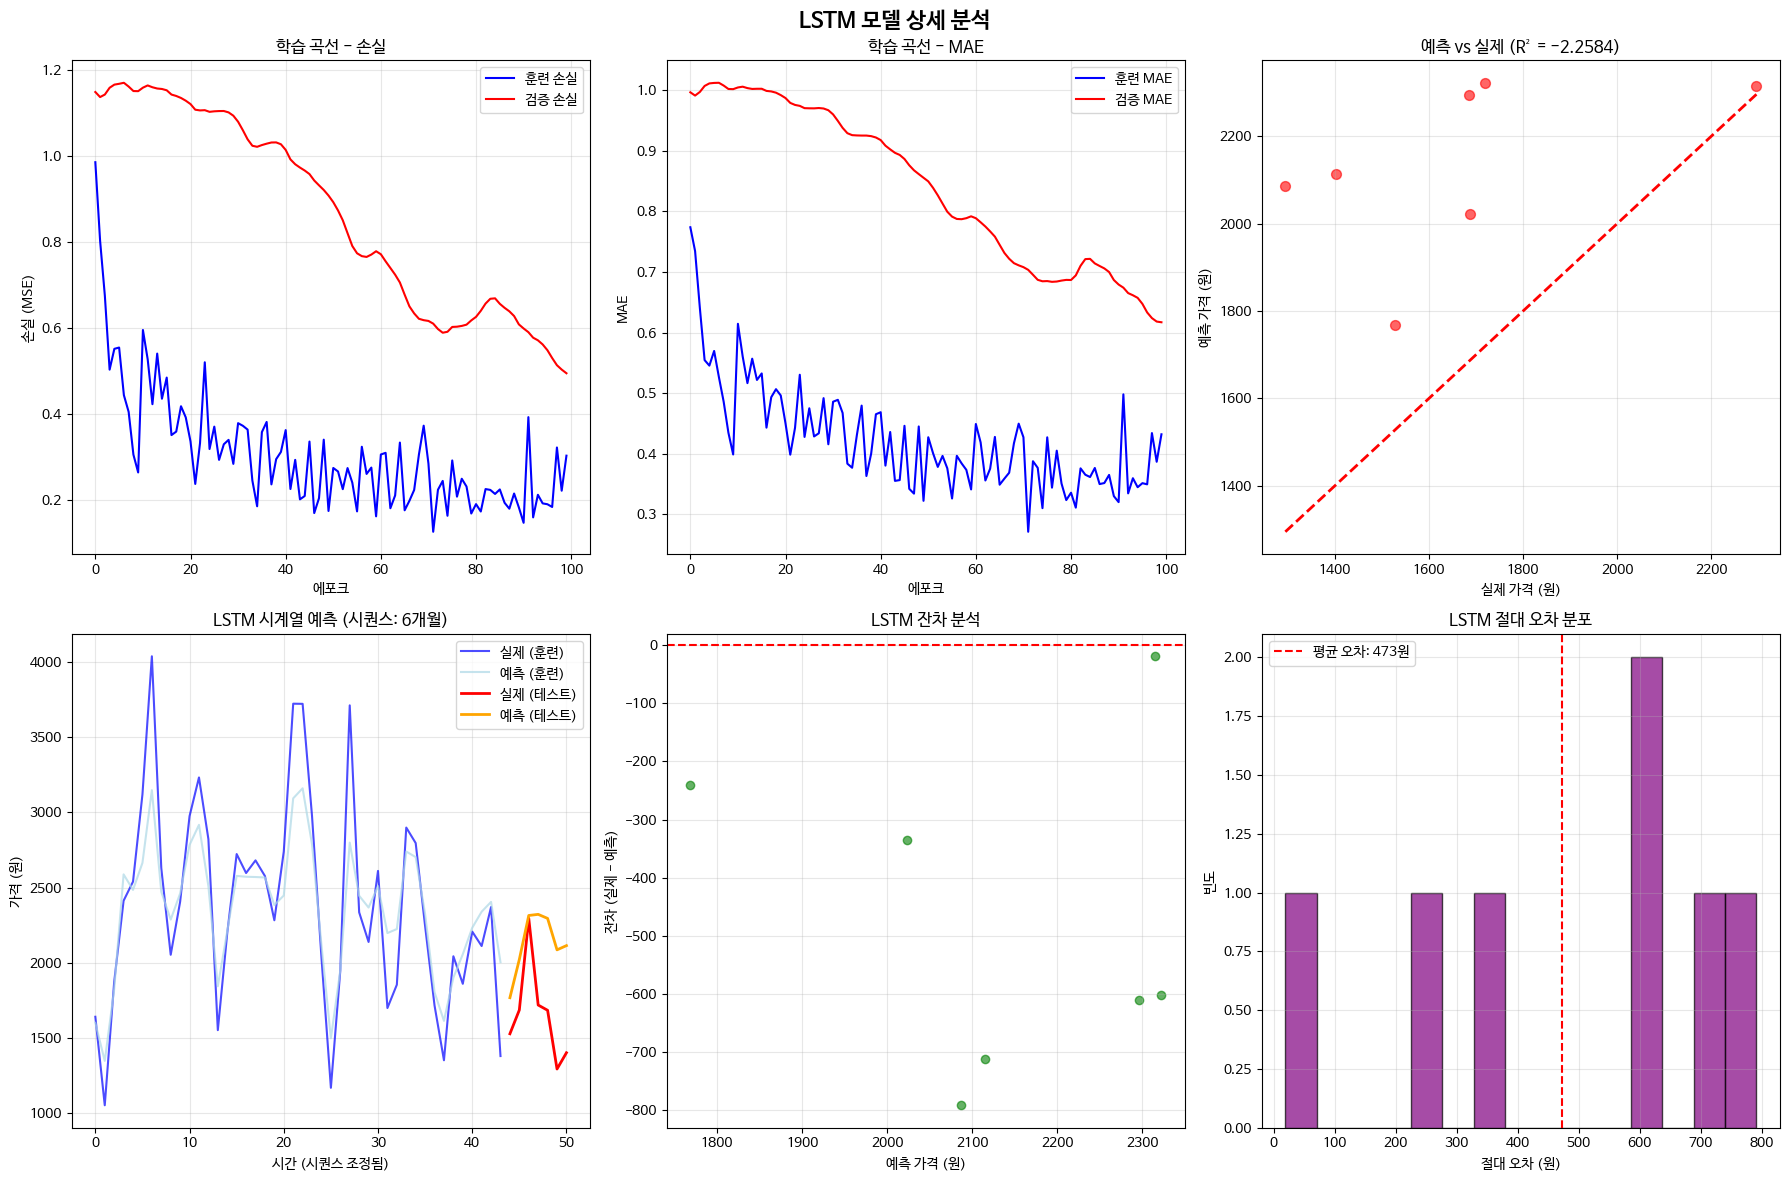


üïê ÏãúÍ≥ÑÏó¥ ÌäπÏÑ± Î∂ÑÏÑù:
   ÏµúÎåÄ Ïò§Ï∞®: 792Ïõê
   Ïò§Ï∞® ÌëúÏ§ÄÌé∏Ï∞®: 260Ïõê
   Ïò§Ï∞® 90% Î∂ÑÏúÑÏàò: 744Ïõê
   500Ïõê Ïù¥ÎÇ¥ ÏòàÏ∏° ÎπÑÏú®: 42.9%
   Ï¥àÍ∏∞ 6Í∞úÏõî ÌèâÍ∑† Ïò§Ï∞®: 433Ïõê
   ÏµúÍ∑º 6Í∞úÏõî ÌèâÍ∑† Ïò§Ï∞®: 512Ïõê


In [41]:
lstm_results = train_and_evaluate_lstm(X, y, sequence_length=6, test_size=0.2, detailed_analysis=True)

In [44]:
def compare_models(xgb_results, lstm_results):
    """
    XGBoostÏôÄ LSTM Î™®Îç∏ ÏÑ±Îä• ÎπÑÍµê
    """
    print("\nüèÜ XGBoost vs LSTM ÏÑ±Îä• ÎπÑÍµê")
    print("=" * 60)

    # ÏÑ±Îä• ÏßÄÌëú ÎπÑÍµê ÌÖåÏù¥Î∏î
    comparison = pd.DataFrame({
        'XGBoost': [
            xgb_results['metrics']['test_mae'],
            xgb_results['metrics']['test_rmse'],
            xgb_results['metrics']['test_mape'],
            xgb_results['metrics']['test_r2']
        ],
        'LSTM': [
            lstm_results['metrics']['test_mae'],
            lstm_results['metrics']['test_rmse'],
            lstm_results['metrics']['test_mape'],
            lstm_results['metrics']['test_r2']
        ]
    }, index=['MAE (Ïõê)', 'RMSE (Ïõê)', 'MAPE (%)', 'R¬≤'])

    # ÏäπÏûê Í≤∞Ï†ï
    comparison['ÏäπÏûê'] = ['XGBoost' if comparison.loc[idx, 'XGBoost'] < comparison.loc[idx, 'LSTM'] else 'LSTM'
                      for idx in ['MAE (Ïõê)', 'RMSE (Ïõê)', 'MAPE (%)', 'R¬≤']]
    comparison.loc['R¬≤', 'ÏäπÏûê'] = 'XGBoost' if comparison.loc['R¬≤', 'XGBoost'] > comparison.loc['R¬≤', 'LSTM'] else 'LSTM'

    print(comparison)

    # ÏãúÍ∞ÅÏ†Å ÎπÑÍµê
    fig, axes = plt.subplots(1, 2, figsize=(15, 6))

    # ÏÑ±Îä• ÏßÄÌëú ÎπÑÍµê Ï∞®Ìä∏
    metrics_names = ['MAE', 'RMSE', 'MAPE', 'R¬≤']
    xgb_values = [xgb_results['metrics']['test_mae'], xgb_results['metrics']['test_rmse'],
                  xgb_results['metrics']['test_mape'], xgb_results['metrics']['test_r2']]
    lstm_values = [lstm_results['metrics']['test_mae'], lstm_results['metrics']['test_rmse'],
                   lstm_results['metrics']['test_mape'], lstm_results['metrics']['test_r2']]

    x = np.arange(len(metrics_names))
    width = 0.35

    axes[0].bar(x - width/2, xgb_values, width, label='XGBoost', color='skyblue', alpha=0.8)
    axes[0].bar(x + width/2, lstm_values, width, label='LSTM', color='lightcoral', alpha=0.8)
    axes[0].set_xlabel('ÏÑ±Îä• ÏßÄÌëú')
    axes[0].set_ylabel('Í∞í')
    axes[0].set_title('XGBoost vs LSTM ÏÑ±Îä• ÎπÑÍµê')
    axes[0].set_xticks(x)
    axes[0].set_xticklabels(metrics_names)
    axes[0].legend()
    axes[0].grid(True, alpha=0.3)

    # ÏòàÏ∏° Ï†ïÌôïÎèÑ ÎπÑÍµê (ÏÇ∞Ï†êÎèÑ)
    # ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞ÏóêÏÑú Í≥µÌÜµ Î∂ÄÎ∂Ñ Ï∂îÏ∂ú (LSTMÏùÄ ÏãúÌÄÄÏä§ Í∏∏Ïù¥ÎßåÌÅº ÏßßÏùå)
    seq_len = lstm_results['sequence_length']
    xgb_test_subset = xgb_results['predictions']['test'][-len(lstm_results['predictions']['test']):]
    xgb_actual_subset = xgb_results['actual']['test'][-len(lstm_results['actual']['test']):]

    axes[1].scatter(xgb_actual_subset, xgb_test_subset, alpha=0.6, color='blue',
                   s=50, label='XGBoost')
    axes[1].scatter(lstm_results['actual']['test'], lstm_results['predictions']['test'],
                   alpha=0.6, color='red', s=50, label='LSTM')

    # ÏôÑÎ≤ΩÌïú ÏòàÏ∏°ÏÑ†
    all_actual = np.concatenate([xgb_actual_subset, lstm_results['actual']['test']])
    min_val, max_val = all_actual.min(), all_actual.max()
    axes[1].plot([min_val, max_val], [min_val, max_val], 'k--', linewidth=2, alpha=0.8)

    axes[1].set_xlabel('Ïã§Ï†ú Í∞ÄÍ≤© (Ïõê)')
    axes[1].set_ylabel('ÏòàÏ∏° Í∞ÄÍ≤© (Ïõê)')
    axes[1].set_title('ÏòàÏ∏° Ï†ïÌôïÎèÑ ÎπÑÍµê (ÌÖåÏä§Ìä∏ ÏÑ∏Ìä∏)')
    axes[1].legend()
    axes[1].grid(True, alpha=0.3)

    plt.tight_layout()
    plt.show()

    # Ï¢ÖÌï© ÌèâÍ∞Ä
    print(f"\nüéØ Ï¢ÖÌï© ÌèâÍ∞Ä:")

    # Í∞Å ÏßÄÌëúÎ≥Ñ ÏäπÏûê Ïπ¥Ïö¥Ìä∏
    xgb_wins = sum([1 for winner in comparison['ÏäπÏûê'] if winner == 'XGBoost'])
    lstm_wins = sum([1 for winner in comparison['ÏäπÏûê'] if winner == 'LSTM'])

    print(f"   XGBoost Ïö∞Ïäπ ÏßÄÌëú: {xgb_wins}Í∞ú")
    print(f"   LSTM Ïö∞Ïäπ ÏßÄÌëú: {lstm_wins}Í∞ú")

    if xgb_wins > lstm_wins:
        print(f"   üèÜ Ï¢ÖÌï© Ïö∞Ïäπ: XGBoost")
        print(f"   Ï£ºÏöî Í∞ïÏ†ê: ÌäπÏÑ± Ï§ëÏöîÎèÑ Ìï¥ÏÑù Í∞ÄÎä•, ÏïàÏ†ïÏ†Å ÏÑ±Îä•")
    elif lstm_wins > xgb_wins:
        print(f"   üèÜ Ï¢ÖÌï© Ïö∞Ïäπ: LSTM")
        print(f"   Ï£ºÏöî Í∞ïÏ†ê: ÏãúÍ≥ÑÏó¥ Ìå®ÌÑ¥ ÌïôÏäµ, Ïû•Í∏∞ ÏùòÏ°¥ÏÑ± Ìè¨Ï∞©")
    else:
        print(f"   ü§ù Î¨¥ÏäπÎ∂Ä: Îëê Î™®Îç∏ Î™®Îëê Ïö∞ÏàòÌïú ÏÑ±Îä•")

    # Ïã§Ïö©Ï†Å Í∂åÏû•ÏÇ¨Ìï≠
    print(f"\nüí° Ïã§Ïö©Ï†Å Í∂åÏû•ÏÇ¨Ìï≠:")
    if xgb_results['metrics']['test_mape'] < 20:
        print(f"   XGBoost: MAPE {xgb_results['metrics']['test_mape']:.1f}% - Ïã§Ïö©Ï†Å ÏàòÏ§Ä")
    else:
        print(f"   XGBoost: MAPE {xgb_results['metrics']['test_mape']:.1f}% - Ï∂îÍ∞Ä Í∞úÏÑ† ÌïÑÏöî")

    if lstm_results['metrics']['test_mape'] < 20:
        print(f"   LSTM: MAPE {lstm_results['metrics']['test_mape']:.1f}% - Ïã§Ïö©Ï†Å ÏàòÏ§Ä")
    else:
        print(f"   LSTM: MAPE {lstm_results['metrics']['test_mape']:.1f}% - Ï∂îÍ∞Ä Í∞úÏÑ† ÌïÑÏöî")


üèÜ XGBoost vs LSTM ÏÑ±Îä• ÎπÑÍµê
             XGBoost        LSTM       ÏäπÏûê
MAE (Ïõê)   567.849487  472.971924     LSTM
RMSE (Ïõê)  613.127242  539.759226     LSTM
MAPE (%)   33.657458   31.360700     LSTM
R¬≤         -0.161385   -2.258413  XGBoost


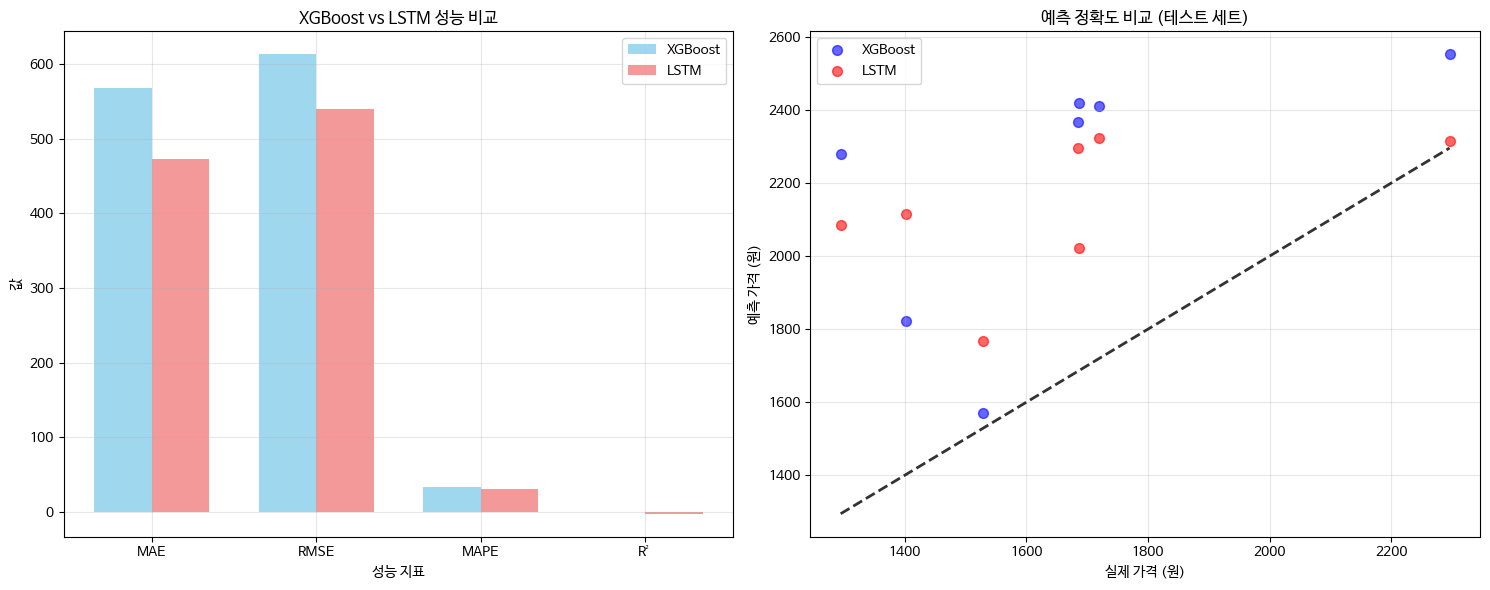


üéØ Ï¢ÖÌï© ÌèâÍ∞Ä:
   XGBoost Ïö∞Ïäπ ÏßÄÌëú: 1Í∞ú
   LSTM Ïö∞Ïäπ ÏßÄÌëú: 3Í∞ú
   üèÜ Ï¢ÖÌï© Ïö∞Ïäπ: LSTM
   Ï£ºÏöî Í∞ïÏ†ê: ÏãúÍ≥ÑÏó¥ Ìå®ÌÑ¥ ÌïôÏäµ, Ïû•Í∏∞ ÏùòÏ°¥ÏÑ± Ìè¨Ï∞©

üí° Ïã§Ïö©Ï†Å Í∂åÏû•ÏÇ¨Ìï≠:
   XGBoost: MAPE 33.7% - Ï∂îÍ∞Ä Í∞úÏÑ† ÌïÑÏöî
   LSTM: MAPE 31.4% - Ï∂îÍ∞Ä Í∞úÏÑ† ÌïÑÏöî


In [45]:
compare_models(xgb_results, lstm_results)

In [46]:
print(f"XGBoost ÏµúÍ≥† ÌäπÏÑ±: {xgb_results['model'].feature_importances_.argmax()}")
print(f"LSTM ÏµúÏ†Å ÏóêÌè¨ÌÅ¨: {len(lstm_results['history'].history['loss'])}")

XGBoost ÏµúÍ≥† ÌäπÏÑ±: 22
LSTM ÏµúÏ†Å ÏóêÌè¨ÌÅ¨: 100
